# Local

In [ ]:
# {
#   "reviewerID": "A2SUAM1J3GNN3B",
#   "asin": "0000013714",
#   "reviewerName": "J. McDonald",
#   "helpful": [2, 3],
#   "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
#   "overall": 5.0,
#   "summary": "Heavenly Highway Hymns",
#   "unixReviewTime": 1252800000,
#   "reviewTime": "09 13, 2009"
# }

## Read raw data

In [1]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

p =10000
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
        if i%p == 0:
            print(i,'th row: ', d)
        
    return pd.DataFrame.from_dict(df, orient='index')

In [3]:
# read data and turn it into dictionary
rawdata = parse('../../data/item_dedup.json.gz')

In [37]:
# length distribution check
org_data = rawdata
len_summaries = [len(d['summary'].split()) for d in org_data]

In [51]:
# max, min, distribution
import pandas as pd
len_summaries_df = pd.DataFrame(len_summaries)
len_summaries_df.describe()

,0
count,8.267712e+07
mean,4.064714e+00
std,2.807172e+00
min,0.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,5.000000e+00
max,5.800000e+01


In [53]:
import pickle 
pickle.dump(len_summaries_df, open('len_summaries_df.pkl', 'wb'))

In [54]:
import numpy as np
hist,bins=np.histogram(len_summaries_df,bins=50)
print(hist)

[ 8992762 20531140 14410285 11300536  8248811  6122519  7020053  1959297
  1353488   913687   575518   376750   411383   116093    83449    62720
    48535    41768    55430    18034    13230     9141     5904     3425
     1761     1104      131       62       16       19       13       11
       10        4        2        5        2        7        1        1
        1        1        1        1        1        1        1        0
        0        2]


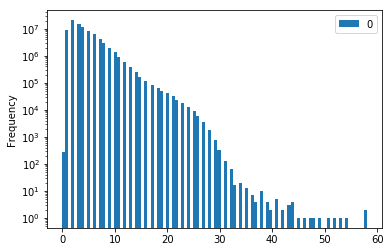

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.hist(len_summaries_df, bins=100)

len_summaries_df.plot.hist(bins=100)
plt.yscale('log')
plt.show()

In [100]:
no =0

i = 0
df = {}

for d in org_data:
    df[i] = d
    i += 1    
#     print(type(d))
    print(i,'summary',len(d['summary'].split()))
        
    no +=1
    if no>=5:
        break
        
data = pd.DataFrame.from_dict(df, orient='index')

1 summary 3
2 summary 3
3 summary 3
4 summary 5
5 summary 1


In [101]:
df

{0: {'asin': '0000013714',
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': 'Heavenly Highway HymnsI ordered this hymnal because I learned to read shaped note music when I was a teenager. I play piano but do not sing. I am 85 years old. This hymnal has mostof the songs I have learned over the years. It was exactly what I wanted and needed.It was in good condition and the price was right. I purchased this book from Amazon.',
  'reviewTime': '10 16, 2012',
  'reviewerID': 'A3BED5QFJWK88M',
  'reviewerName': 'jimedd',
  'summary': 'Heavenly Highway Hymns',
  'unixReviewTime': 1350345600},
 1: {'asin': '0000013714',
  'helpful': [2, 3],
  'overall': 5.0,
  'reviewText': 'I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!',
  'reviewTime': '09 13, 2009',
  'reviewerID': 'A2SUAM1J3GNN3B',
  '

In [69]:
print(data.reviewText[0])
print('summary:', data.summary[0])
data[['asin','reviewText','summary']]

You may laugh, but I have found that Otherland volumes 1-4 are poor at picking up debris around the house.  I once spilled some cornflakes on the floor, and foolishly thought that I could clean it up by dropping &#34;City of Golden Shadows&#34; on it.  Not only did it not clean, it managed to make things worse by fragmenting the cornflakes into smaller and smaller pieces.  I did what any normal person would do: I stacked the other books on top, hoping that the combined power would whisk the cornflakes away to the technological wonderland that is Otherland.  No such results.Bin Otherland Empty, on the other hand, works like magic.  If you hook it up to a powerful enough motor, you can banish those cornflakes to the land of wind and ghosts.  The downside is that it's pretty light reading, but given the young adult trend these days it's following the light reading trend that literature is headed for these days.It's recommended that you get through the previous volume though (&#34;Hoover E

,asin,reviewText,summary
0,0000029831,"You may laugh, but I have found that Otherland...",The superior cleanser
1,0000029831,Do not try and vacuum the dust. That's impossi...,Very deep and thought provoking.
2,0000029831,What if Dread had come out victorious and left...,WHAT IF....?


In [29]:
print(len(data.summary[0].split()))
data.summary[0].split()

5


['Listing', 'is', 'all', 'screwed', 'up']

In [ ]:
['reviewerID': 'A10TK8OL2NJ1FU', 'asin': '0380797178', 'reviewerName': 'Jasmine', 'helpful': [4, 5], 'reviewText': "Well, Poppy and Erith are going to tell Ragweed's parents that he died, so on their way they meet Rye, who just so happens to be Ragweed's brother he is out seasrching for Ragweed, and then they break the news to him that Ragweed died, which actually might be a not so bad thing, because for Rye being second best in his family was a way of life they liked Ragweed better, but now would be a perfect chance for Rye to prove himself, I could tell you what happens, but you'll just have to read the book!.............!", 'overall': 5.0, 'summary': 'ANOTHER ONE!!!', 'unixReviewTime': 1043971200, 'reviewTime': '01 31, 2003']

In [8]:
# read data and turn it into pandas dataframe
df = getDF('../data/item_dedup.json.gz')

10000 th row:  {'reviewerID': 'A31058CO8X7LQN', 'asin': '000224053X', 'reviewerName': 'atr1688 "atr1688"', 'helpful': [2, 14], 'reviewText': 'It would take to many time to explain all the reasons why i loved this and the two following books. If you like hard sci-fi its a must read book.', 'overall': 5.0, 'summary': 'Best Science- Fiction ever red', 'unixReviewTime': 1106784000, 'reviewTime': '01 27, 2005'}
20000 th row:  {'reviewerID': 'AYE6KHD4A9CJN', 'asin': '0005019281', 'reviewerName': 'Kevin Barnett "KD Barnett"', 'helpful': [0, 0], 'reviewText': "I first saw this movie as a kid in the late 70's. I never forgot and when i found it on dvd i could not resist. It brought just as much enjoyment now as then. I like the twist on a classic with an American version.", 'overall': 4.0, 'summary': 'The Fonz does Scrooge', 'unixReviewTime': 1261526400, 'reviewTime': '12 23, 2009'}
30000 th row:  {'reviewerID': 'AQ5U1DAQLGKK1', 'asin': '0006550436', 'reviewerName': 'Lily', 'helpful': [0, 0], '

110000 th row:  {'reviewerID': 'A1EOZJW1OPR01', 'asin': '0007447868', 'reviewerName': 'Karen Miller', 'helpful': [22, 33], 'reviewText': "While I absolutely believe that there is no 'right' or 'wrong' response to a book, because it's all just personal opinion, I'm taken aback by some of the hostility I'm seeing here.If you went to see a play, would  you complain the story wasn't finished at the end of the first act? No. There's an interval and then there's a second act, and then there's the end. So okay, this story has more than 2 acts. By the end it will have, maybe, 7. So it's not really fair to say 'these characters aren't important' or 'this was just a bridge' or 'we didn't get to the end' ...  because until we do reach the end, we can't tell.I believe Martin is the single greatest fantasy writer of our time. I think he will go down in history as one of the greatest, full stop. Was I frustrated at the long time between books 3 and 4? You'd better believe it. Am I sorry that some of

230000 th row:  {'reviewerID': 'A28I5ZYRQ58VGD', 'asin': '0060282983', 'reviewerName': 'gwen wall', 'helpful': [0, 0], 'reviewText': 'The world needs to love one another again just as the characters in this story did!  Charlotte teaches us the true meaning of giving and love.', 'overall': 5.0, 'summary': 'A Wonderful Love Story', 'unixReviewTime': 1402444800, 'reviewTime': '06 11, 2014'}
240000 th row:  {'reviewerID': 'AE14CDBIN1KYA', 'asin': '0060392886', 'reviewerName': 'B. M. Ballard "Book Lover"', 'helpful': [0, 0], 'reviewText': 'This book was fantastic I loved the whole thing and read it in about 2 days. I would have liked to hear from Tommy Lee more as I found him to be the funniest and most interesting to read. All in all an awesome book that deserves 5 stars!!', 'overall': 5.0, 'summary': "Rockin' Book", 'unixReviewTime': 1163203200, 'reviewTime': '11 11, 2006'}
250000 th row:  {'reviewerID': 'A1US8UAPHMFBKW', 'asin': '0060509546', 'reviewerName': 'Gayle "brighttyger"', 'helpf

360000 th row:  {'reviewerID': 'A2TX179XAT5GRP', 'asin': '0060739592', 'reviewerName': 'TeensReadToo "Eat. Drink. Read. Be Merrier."', 'helpful': [10, 10], 'reviewText': 'Twelve-year-old Fern McAllister is the black sheep of her family, set apart by pale skin that blisters after moments in the sun and dark black hair in a family of blondes. Her strange sensitivity to light, and seeming ability to communicate with the family dog, are secondary concerns to the kids at her middle school who tease her for having an absent father. Despite gaining herself the nickname "freaky Fern," she leads a generally happy life, thanks to her mother\'s caring and her twinbrother Sam\'s friendship.But one day in the middle of English, Fern simply disappears. No one can find her; no one has seen her leave the room, much less her desk. Unbeknownst to her classmates, Fern has somehow managed to teleport to Pirate Cove, her favorite part of a nearby beach. Frightened and unsure of how she got there, Fern trie

410000 th row:  {'reviewerID': 'A2Q20HP871VSKW', 'asin': '0060820942', 'reviewerName': 'JerseyTomato', 'helpful': [21, 21], 'reviewText': "I cannot say enough wonderful things about this cookbook.  People have mentioned the beautiful photos and yes, they are certainly there.  The writing helps to weave a spell about the recipes.  You are not just making a soup, but the soup her aunt used to make when...The recipes will knock your socks off.  The roasted tomato tart is worth the price of the book.  My book club was blown away by the bluberry tart.  A gluten intolerant guest was thrilled with Gateau Lawrence.  (Flourless chocolate.  Easy, intense, and will make you a legend among your friends).  The soups are excellent too.  Oh yes, and the cabbage pie (galette) I made just because it sounded so weird, that was wonderful too.  The recipes seem to 'work' if you know what I mean.  You may choose to reduce the butter and make adjustments, but they turn out beautifully as written.One complai

540000 th row:  {'reviewerID': 'A1NWPOFCB9C7IL', 'asin': '0061093092', 'reviewerName': 'ReasonableGoatPerson', 'helpful': [0, 0], 'reviewText': 'Lawyer is a 7-letter word in my vocabulary, so color me shocked when I started reading Lily White, with a lawyer as its main character, and I was actually liking Ms White, not cursing her; nor imagining creative & painful ways in which she could be killed off, but wishing her a long and happy life. Surprise!The story is told in alternating chapters: one chapter in "the present", where Lily (known as Lee) is working as lawyer for a conman accused of murdering one of his marks; and then one in "the past", that tells Lee\'s life story, from her parents\' marriage, her subsequent birth, up until close to the time of the present-day story. Forth and back it goes.From the get-go, there are intimations of where the conman story is going, and really it\'s just a matter of how it plays out. Still, even despite knowing, I couldn\'t wait to find out what

670000 th row:  {'reviewerID': 'AY6L3PPCYAUS0', 'asin': '0061568228', 'reviewerName': 'Emrys R. Lloyd-Roberts', 'helpful': [10, 36], 'reviewText': 'This book starts with the premise that we do not know anything about the original gospels, now forming part of the new Testament, and then goes on to form a theological view based on what he images those original texts say. There are no facts about these gospels, only assumptions and conjecture.If you want a book about religion without reason and logic, this is your book.', 'overall': 1.0, 'summary': 'Salvation', 'unixReviewTime': 1347580800, 'reviewTime': '09 14, 2012'}
680000 th row:  {'reviewerID': 'ADFS4PIEY14G6', 'asin': '0061628018', 'reviewerName': 'Barbara N. Bybee "barbara_bybee         6867 ...', 'helpful': [1, 1], 'reviewText': "Excellent book....I'm from Utah and Warren Jeffs is in prison.....Yay,  Well, written.  Happy to see this intelligent girl is out of his clutches.", 'overall': 5.0, 'summary': 'Elissa Wall story.', 'unixR

800000 th row:  {'reviewerID': 'A1Q50CMX1G68LS', 'asin': '0061965804', 'reviewerName': 'cb', 'helpful': [3, 3], 'reviewText': 'Kind of an Ice Station Zebra,The Thing,meets an episode of x-files redux.The hero and heroine are seriously annoying.The tough-girl professor with the rabid anti-gun,anti military attitude gets old fast. As does her constant whining about things like a multi-million dollar heavy equipment elevator not being safe for her kid and complaining when someone opens a helicopter window because her kid might catch a draft.Coupled with asking if the real motive for the expedition is to allow "corporations" to rape the continent.Its all just a little too much for me.Our "hero" spelunker from Austrailia quickly realizes that the quickest way to professor moms heart is through the kid and makes every attempt to assure that he makes him his "little buddy". All the while complaining that the Military is destroying the "environment".Some might like it but......yeah, I\'m sendi

860000 th row:  {'reviewerID': 'A38RLKRBJOPTBW', 'asin': '0062024027', 'reviewerName': 'Autumn', 'helpful': [0, 0], 'reviewText': "LOVE.THIS. BOOK. If you are planning on seeing the new Divergent movie, don't until you read the book. Half of the movie won't make sense if you don't. I recommend this book to anyone 10-100.", 'overall': 5.0, 'summary': 'Just Another Divergent Fan', 'unixReviewTime': 1402963200, 'reviewTime': '06 17, 2014'}
870000 th row:  {'reviewerID': 'A18FKLN6W1O39B', 'asin': '0062026542', 'reviewerName': 'Lindsey Maxwell', 'helpful': [1, 1], 'reviewText': "I am trying to encourage everyone I know to read this series! No one listens to me. Rae Carson is unpredictable so I really didn't know how it was going to end. I just want everyone to pick up this series and read it. It was amazing. I giggled like a school girl and whooped through out this series. Loved the Hector chapters. The first time the chaper heading said &#34;Hector&#34; I believe I said out loud, &#34; Oh 

1000000 th row:  {'reviewerID': 'A3N4YAHBI0JRNF', 'asin': '0062217208', 'reviewerName': 'Ellen Horan "DOMAGRACE"', 'helpful': [9, 15], 'reviewText': "There is nothing more frightening than being wrongly accused. In a perfect world, one would simply correct the error and move on. What makes this a gripping book and a horror tale of sorts, is that Amanda Knox became trapped in an international legal nightmare. She was a middle class American student, who ended up in solitary confinement and imprisoned with hardened criminals for over four years for a murder that no rational person would think she committed. How that day to day reality unfolded is the basis of this book, up to her release. The who what and why it happened is still a mystery. Why did the Italian prosecutor hate her? Was the DNA evidence tampered with to frame her? Why did the legal system fail her? Where WAS the American consulate at any time, and early on in her ordeal? Where was the American State Dept? There are lots of

1140000 th row:  {'reviewerID': 'A1NATT3PN24QWY', 'asin': '0071373365', 'reviewerName': 'Rolf Dobelli "getAbstract"', 'helpful': [5, 15], 'reviewText': "Mark J. Barrenechea, a senior vice president for applications development at Oracle Corp., describes how to transform a company by using a range of e-business applications. He draws on Oracle's success at changing its business by using the Internet and networking to interconnect employees, customers and suppliers. Barrenechea's useful roadmap shows how your company can apply these methods to coordinate, systematize and streamline operations. He demonstrates how other companies - including General Motors, Boeing and Microsoft - use e-business networking. He writes in a straightforward style without jargon and maintains a keen focus on operations, making this book a wealth of practical knowledge. Of course, that same focus might limit the book's appeal to executives without an interest in operations technology and to other mainstream rea

1240000 th row:  {'reviewerID': 'A2KFOGTNOM42UH', 'asin': '0073376450', 'reviewerName': 'Deezer "Deezer"', 'helpful': [1, 3], 'reviewText': 'Great condition and quick service  - I was very pleased with this vendor in purchasing this book.  The whole process was quick and easy', 'overall': 5.0, 'summary': 'Great service', 'unixReviewTime': 1315180800, 'reviewTime': '09 5, 2011'}
1250000 th row:  {'reviewerID': 'A37M8Z2H5W7762', 'asin': '0073527963', 'reviewerName': 'Yeed', 'helpful': [0, 0], 'reviewText': 'The book is lengthy and is everything you expect from a criminal justice book with some added bonuses such as little included stories in the chapter to help the reader to better understand the concepts and chapter as well as the vocabulary of the text book.', 'overall': 4.0, 'summary': 'Criminal justice', 'unixReviewTime': 1360972800, 'reviewTime': '02 16, 2013'}
1260000 th row:  {'reviewerID': 'AC9ZMFQB5BAV6', 'asin': '0077514742', 'reviewerName': 'Nicole', 'helpful': [0, 0], 'review

1340000 th row:  {'reviewerID': 'A3ETKB8439BBQR', 'asin': '0123694736', 'reviewerName': 'T. Cunningham "Rb Man"', 'helpful': [1, 1], 'reviewText': "If all of the Apple frameworks were explained as well as CoreGraphics/Quartz is in this book, life would be so much better for independent programmers. I am not writing code in XCode, but one where I need to port calls to custom classes. This book has helped me so much. I have not located the link on the publisher's site (maybe I'm just missing it), but my only complaint (a very minor one) would be that they don't have a contact email for the authors to report errata or thank them.Well written, to the point, good code examples and does not duplicate the Apple documents. Covers Carbon and Cocoa calls. The chapters on axial and radial shadings were the most helpful for me.", 'overall': 5.0, 'summary': 'Excellent Book', 'unixReviewTime': 1179014400, 'reviewTime': '05 13, 2007'}
1350000 th row:  {'reviewerID': 'AF0W0VJRVCE99', 'asin': '01302080

1440000 th row:  {'reviewerID': 'ABYT6AXJ1TEO9', 'asin': '0138419418', 'reviewerName': 'Vivien', 'helpful': [0, 0], 'reviewText': "This is my textbook.  but i don't like it very much.  i am the beginner of the JavaScript, this book even doesn't help me at all.  there are a lot of things had not talked about it before it pop up, it just suddenly appear before your eyes.  I always get lost because of that.", 'overall': 1.0, 'summary': 'If your are the beginner, this is not your choice !!!!!!!', 'unixReviewTime': 1016409600, 'reviewTime': '03 18, 2002'}
1450000 th row:  {'reviewerID': 'A3RKEF64X6KZ17', 'asin': '0140053204', 'reviewerName': 'C. Lewis', 'helpful': [0, 0], 'reviewText': 'Easy read, lots of cute one-liners and a little wisdom.  Interesting to read about his Southern encounters in the 1960s.', 'overall': 4.0, 'summary': 'Nice read', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
1460000 th row:  {'reviewerID': 'A1Y8CLNTCLR04O', 'asin': '0140098275', 'reviewerName':

1520000 th row:  {'reviewerID': 'A1T17LMQABMBN5', 'asin': '0140298479', 'reviewerName': 'CoffeeGurl', 'helpful': [8, 8], 'reviewText': "This novel was a great read, it was hilarious.  May I say that I think it's funnier than the original. Of course, it is not very different from the original -- she is still trying to quit smoking and trying to lose  weight, but the heroine seems a little more together this time  around.There was a setback, the whole death threat thing, for a minute  there I thought I was reading a mystery novel (I hate mystery novels) --  but other than that, it is great!  I was cracking up on the subway train on  my way to work this morning while I read the chapter in which she was  interviewing Colin Firth -- the actor who played Mr. Darcy in Pride and  Prejudice. The people on the train were staring at me, but I couldn't help  it, it was too funny.I know it sounds insane but I do wish Miss Fielding  writes another Bridget Jones novel. I would happily buy all the Bri

1600000 th row:  {'reviewerID': 'A1ZWGRWZV428LV', 'asin': '014104022X', 'reviewerName': 'Brian', 'helpful': [0, 0], 'reviewText': 'A wonderful story full of many aspects of the many facets of a hard and difficult journey. Warm strong emotional.', 'overall': 5.0, 'summary': 'A heart warming story', 'unixReviewTime': 1382486400, 'reviewTime': '10 23, 2013'}
1610000 th row:  {'reviewerID': 'A1ZPO4Y05SPIWW', 'asin': '0141187425', 'helpful': [16, 28], 'reviewText': "Drawing upon the work of Michel Foucault, Edward Said claims that Western ideas of the `Orient' are not based upon objective facts but are created through academic and cultural `discourses' which serve to promote Western imperialism - often despite `liberal' intentions.This mythical `East' is the antithesis of the West, a negative or inversion of the 'Occident' which is used to define *both* in binary opposition to each other, and to facilitate the political and domination of the East.However in order to demonstrate the existenc

1690000 th row:  {'reviewerID': 'A14JH0ILQ660IT', 'asin': '0142196193', 'reviewerName': 'Free Polazzo', 'helpful': [5, 8], 'reviewText': 'I really like these books and the way they are written.  The question and answer format make it easy to use it as a "reference" and also allows one to read a few pages at a time.The question and answer format is also wonderful because alot of what Judiasm is about is questions.  "Question Everything" must have been the eleventh commandment.What is missing are important topics.  I wrote to the author in 1996 and he was kind enough to repy to my question.  I wrote:"I enjoy reading your book . . .  However, there is a major omission that I need to ask about.  Why is the subject of War (and violence) not covered?Your biography says you were/are active as a military chaplain.  I imagine that your role as chaplain and advisor to chaplains would put you in a great position to speak to the question of war and Jewish Law.Perhaps your wrote about this in anoth

1780000 th row:  {'reviewerID': 'A23ORR2740NR2U', 'asin': '0143037838', 'reviewerName': 'Greg Beesch "GregB"', 'helpful': [25, 34], 'reviewText': 'The tone of arrogance and condescension really diminish what would otherwise be a good autobiographical case study of growing a hobby/skill into a successful brand. Critical self assessment is sometimes subordinated to over emotive passages and screeds about Chouinard\'s take social and economic trends.  Some of the more interesting aspects of forming company goals and culture were lost amid a general tone of contempt for what Chouinard considers `the business world\'.  The good stuff is there, you just have to get past the maverick chest thumping and "I am a reluctant businessman and I run my business better without old and tired business practices and paradigms. . . like profit".Two things were rather galling. First, the first sentence "No young kid growing up ever dreams of becoming a businessman." Well, sorry, a lot of kids actually do, 

1890000 th row:  {'reviewerID': 'A1FPVKQVRRF2ZA', 'asin': '0143170104', 'reviewerName': 'Amy Senk "Read it, Loved it"', 'helpful': [0, 1], 'reviewText': "The Girl Who Played With Fire is better than the first book -- and I adored the first book, so that's saying something. In this second book of the trilogy, we learn about Lisbeth -- everything from what she did right after the first book ended to what made her the person she became -- in a complicated, intricately plotted story.The opening scenes with Lisbeth enjoying new riches on the beach didn't seem to add much to the story, but once she was home in Europe, wham! It was like a roller coaster taking off, with journalists doing their thing, sex traders doing their thing, killers doing their thing and Lisbeth doing her thing.The story, told through various characters' perspectives, is gripping and entertaining. And the ending is great -- answering questions but raising new ones.When is book three coming out in the U.S.??", 'overall':

1990000 th row:  {'reviewerID': 'ATB5DQ3SVQ27G', 'asin': '0195014766', 'reviewerName': 'Charles Bukowski "buk1818"', 'helpful': [0, 8], 'reviewText': 'this book is in excellent shape.  BUT, I ordered it on May 5th , 2009, and did not receive it until June 1st, 2009.  That is way way way way too long to get my book, and I will not order from this customer again.', 'overall': 4.0, 'summary': 'The Art of War, by Sun Tzu, Thomas Cleary used book', 'unixReviewTime': 1244246400, 'reviewTime': '06 6, 2009'}
2000000 th row:  {'reviewerID': 'A1VE8QL8RJ9SCU', 'asin': '0195103092', 'reviewerName': 'tyler zarubin', 'helpful': [0, 7], 'reviewText': 'upon pondering motives for writing this everlasting existential review, i have prostrated that this novel portrays one tipple of a protagonist who through the use of foretasting one is able to percieve ebony in the  circumstances faced by Capitu.  a most separatist prognosis is in order for  this linear novel.', 'overall': 5.0, 'summary': 'an insightful

2080000 th row:  {'reviewerID': 'A2FC00C1NFO59J', 'asin': '0201632160', 'reviewerName': 'Leo Free "Art Scents"', 'helpful': [3, 4], 'reviewText': "I first saw a picture or two on some program to download desktop photos.  I followed some info cuz I was captivated by the Alice pictures.  I discovered Robyn's journey, story and this story book.  I considered buying a used one, but decided to get a new one.  I just love the whole of it and so appreciate  the author not only taking the journey but sharing it with the rest of us.  Even if some of the sharing was against her original plans.  Thanks Robyn.  Your journey touches deeply in inexplicable ways.", 'overall': 5.0, 'summary': 'e Intimacy of Inspiration', 'unixReviewTime': 1171152000, 'reviewTime': '02 11, 2007'}
2090000 th row:  {'reviewerID': 'A3705CPTAQ8BQV', 'asin': '020502940X', 'reviewerName': 'sagarcia_1', 'helpful': [1, 1], 'reviewText': 'Buying the Kindle version, I now have access to it on my MacBook Pro, iPad, and iPhone. Si

2220000 th row:  {'reviewerID': 'A4AU217EBQ47L', 'asin': '0271021195', 'reviewerName': 'D. Moore "Clouseau"', 'helpful': [2, 2], 'reviewText': "A thoughtfully detailed and entertaining narrative with lots of captivating photos of the key people and places of Lincoln's visits to the Commonwealth.  I also liked the appendix which provided guidance on how to follow and experience the Lincoln Trail. I'm not a Lincoln expert, so the accounts of his experiences here were new to me and fascinating to read... but that also means my rating is just a reflection of how much I liked this book, not a comparison to other books about Mr. Lincoln. It is unquestionably well-written.", 'overall': 5.0, 'summary': 'Fascinating,  highly detailed, great pictures!', 'unixReviewTime': 1011139200, 'reviewTime': '01 16, 2002'}
2230000 th row:  {'reviewerID': 'A2IO5NPN61YVWZ', 'asin': '0292716265', 'reviewerName': 'William R. Robertson', 'helpful': [0, 0], 'reviewText': 'I thoroughly enjoyed "One Ranger" and thi

2320000 th row:  {'reviewerID': 'AFZG8ESZAYAYA', 'asin': '0307265757', 'reviewerName': 'Alexander R. Seals', 'helpful': [1, 2], 'reviewText': 'Very descriptive, yet very entertaining, story of Pixar.  This book is told from an unbiased point of view and is engaging from beginning to end.  Definitely recommend for any fan of Pixar!', 'overall': 5.0, 'summary': 'Engaging and Entertaining!', 'unixReviewTime': 1230249600, 'reviewTime': '12 26, 2008'}
2330000 th row:  {'reviewerID': 'A2P5XNVLKUIWR', 'asin': '0307268934', 'reviewerName': 'Ann H Smith', 'helpful': [0, 1], 'reviewText': 'This adventure is blended with  both history and anthropology.  It is informative and compelling.  I do not recommend it for those who only like romance novels or are squemish. It is very informative about an area many of us know little about.', 'overall': 5.0, 'summary': 'GREAT TRUE STORY PLUS HISTORY', 'unixReviewTime': 1354665600, 'reviewTime': '12 5, 2012'}
2340000 th row:  {'reviewerID': 'A356JAJSFPFB5P',

2390000 th row:  {'reviewerID': 'AV09RSTTTQLJW', 'asin': '0307292134', 'reviewerName': 'Logan Ralph', 'helpful': [0, 1], 'reviewText': "Mr. Martin has a gift for great storytelling. I can't wait to check out the HBO series to see how it stacks up to the books. A great read and an even greater escape!", 'overall': 5.0, 'summary': 'A Song of Ice and Fire, Books 1-4', 'unixReviewTime': 1371427200, 'reviewTime': '06 17, 2013'}
2400000 th row:  {'reviewerID': 'A10AVWN2AVDV0V', 'asin': '0307340805', 'reviewerName': 'R. Moore', 'helpful': [0, 1], 'reviewText': "A classic and must-have for every child's book collection. Golden Books are so fun, and this is a great set to get started with.", 'overall': 4.0, 'summary': 'A classic!', 'unixReviewTime': 1225670400, 'reviewTime': '11 3, 2008'}
2410000 th row:  {'reviewerID': 'A25JGEQR5CTSCD', 'asin': '0307346609', 'reviewerName': 'Donna Kuhlmorrison "dragonlady444"', 'helpful': [0, 0], 'reviewText': "I didn't actually see or read the book, it was a 

2480000 th row:  {'reviewerID': 'A1CUZ9COVUDK0J', 'asin': '0307457753', 'helpful': [0, 0], 'reviewText': "What a fantastic book on how we can be bold and relentless in Christ. As a believer in the gifts of God and all that we have power to do through the Holy Spirit this book was an amazing read.  I can't wait to share this book with my congregation and get down to work on what we have authority to do in this world.Never give up! Keep knocking and seeking God for what it is we have authority over!*I received this book as part of the Blogging for Books from waterbrookmultnomah*", 'overall': 5.0, 'summary': 'Wow!', 'unixReviewTime': 1335312000, 'reviewTime': '04 25, 2012'}
2490000 th row:  {'reviewerID': 'AT2EFXZXSSN0R', 'asin': '0307462889', 'reviewerName': 'Judith L', 'helpful': [1, 1], 'reviewText': "This is a very practical guide and learning book for those of us evolving into what our society (laughingly) calls 'senior-hood' - whatever that means.  Clearly, Martha is an example of g

2630000 th row:  {'reviewerID': 'A3K6AG60YBLNZY', 'asin': '0307749649', 'reviewerName': 'Judy Aishman', 'helpful': [0, 0], 'reviewText': 'I loved the continuation of the story line & characters from his previous book. It was hard to figure out who the bad guys were.', 'overall': 4.0, 'summary': 'A very good read', 'unixReviewTime': 1384300800, 'reviewTime': '11 13, 2013'}
2640000 th row:  {'reviewerID': 'A10Z7AYDEVC6S6', 'asin': '0307885259', 'reviewerName': 'farm girl', 'helpful': [0, 0], 'reviewText': 'I felt it dragged along and took forever to get new information.  Get to the point of what you want to say.', 'overall': 3.0, 'summary': 'too much needless info', 'unixReviewTime': 1376438400, 'reviewTime': '08 14, 2013'}
2650000 th row:  {'reviewerID': 'A2GXRU3M22GWY1', 'asin': '0307887898', 'reviewerName': 'Ilya B.', 'helpful': [0, 0], 'reviewText': 'This is a very well written book with implementable advice for anyone who either aspires to create a technology business or experiments

2800000 th row:  {'reviewerID': 'A3BPB7823FZGU2', 'asin': '0310318653', 'reviewerName': 'Crystal DeKalb', 'helpful': [0, 1], 'reviewText': 'One of the most awesome Spirit-filled reads I have come across in a long time.  I am ordering more for my friends and family.  OUTSTANDING!!!', 'overall': 5.0, 'summary': '"One Thousand Gifts"..a breathtaking gift all its own!', 'unixReviewTime': 1350691200, 'reviewTime': '10 20, 2012'}
2810000 th row:  {'reviewerID': 'A2FFL3BAVY9O1V', 'asin': '031032906X', 'reviewerName': 'Adam G Binley', 'helpful': [2, 2], 'reviewText': 'Whether you agree with Rick Warren or not this book is a great read and offers great insight into the mind and character of God. I have been richly blessed learning about the will of God and his purpose for my life. Thank you.', 'overall': 5.0, 'summary': 'A book everyone should read', 'unixReviewTime': 1394323200, 'reviewTime': '03 9, 2014'}
2820000 th row:  {'reviewerID': 'A3JRNFSKJR4C2N', 'asin': '0310332796', 'reviewerName': 

2920000 th row:  {'reviewerID': 'A1K3866HEJZ8RP', 'asin': '0312264917', 'reviewerName': 'Locococo', 'helpful': [19, 21], 'reviewText': 'Chadwick\'s writing is superb, her knowledge of all things medieval and the wool trade is beyond question, but couldn\'t we have chosen more sympathetic characters? Miriel starts off promising as a victim of her mother\'s bad decision in a husband. She\'s been groomed for the wool trade by her indulgent and successful grandfather but then rushed to the nunnery. She\'s constantly a thorn in the side of the nuns and then meets deathly ill Nicholas, who was washed ashore from an ill-fated baggage wain of King John. She helps to nurse him back to health (did we forget there were two other nuns involved in his nursing?), then runs away from the convent when they rid her of her one vanity - her hair - after she shows it off to Nicholas and gets caught. We see this character lie, cheat, steal, and then marry twice to further her position. She commits adultery

3020000 th row:  {'reviewerID': 'A22IKTDMVR681U', 'asin': '0312366523', 'reviewerName': 'gbear "al"', 'helpful': [8, 10], 'reviewText': "I bought this book mostly because I wanted to read stories about Ron's days with The Faces. I saw them play many times and they were one of my favorite live bands back in the late 70's.I'm sure that Ron Wood's story is interesting and compelling on many levels, but this book is a waste. Disorganized doesn't begin to cover how haphazardly this book is assembled. It doesn't work as history, it doesn't work as adventure, and it barely works as biography. It works best as an exercise in cluelessness, as Ron doesn't seem to have any idea how screwed up he sounds. One minute he's writing about how spectacularly broke he is, then within two sentences he's talking about flying off for a tropical vacation somewhere. Supposedly earthshattering events in his life are covered in one sentence (the deaths of loved ones is used to justify more drugs and booze). Havi

3140000 th row:  {'reviewerID': 'AV1D9B474J6LH', 'asin': '0312581777', 'reviewerName': 'LM', 'helpful': [1, 1], 'reviewText': 'This book is a must read if you have any political interests.  The subject seem to be covered very well.  I does seem to be balanced but I am in the middle any ways.  I have recomended this book to may people.', 'overall': 5.0, 'summary': 'Book Review', 'unixReviewTime': 1340064000, 'reviewTime': '06 19, 2012'}
3150000 th row:  {'reviewerID': 'A1KB5A2ZEMT8H3', 'asin': '0312596901', 'reviewerName': 'Lana Larue', 'helpful': [25, 25], 'reviewText': "This book is a fictional romance, based very little on true history. I was excited when I saw this book since so little has been written about Jane Seymour. There must not be much about her in historical documents either, so Erickson just made it up.  It is a really bad romance novel; not at all like the Tudor novels I love. It is my fault: this is the one time I didn't download the sample first. I doubt I would have b

3180000 th row:  {'reviewerID': 'A2AFD14FA91B7', 'asin': '0312644140', 'reviewerName': 'Lyn Reese', 'helpful': [0, 0], 'reviewText': 'Opera fans will love this light, humorous story which fictionalizes the doings of the New York Metropolitan opera diva Geraldine Farrar. They particularly will appreciate the book\'s reenactments of parts of operas in which Farrar performed her "signature" roles. Farrar\'s beauty, fiery temper, and numerous flirtations become part of the plot in which a visiting French baritone who has antagonized everyone uses a throat spray laced with ammonia. His vocal chords, indeed his voice, are permanently damaged. "He might as well be dead," intones Farrar, and soon her words come true. With herself as a major suspect, Farrar, urged on by Enrico Caruso, initiates her own investigation, which turns out to be a delightful romp.Surrounding Farrar are stars who were a major part of her life during the Mets "golden age." The author has created wonderful fictional sket

3230000 th row:  {'reviewerID': 'A35PDS7N6YKEJN', 'asin': '0312864590', 'reviewerName': 'Jon Shore "budanatr"', 'helpful': [0, 0], 'reviewText': "I love this series, but this one is really boring. I suppose it is necessary to read if one is going to finish the series, but Robert Jordan could have given his loyal fans a much better book this time out. I will keep reading the series because I am hooked, but from now on wait for the paperback rather than scooping up the hardcover in the first week after a year of anticipation.You can skim this one and get just as much as you need out of it. Conclusion: Wait for the paperback or borrow a friend's copy if you really want to read this one.", 'overall': 1.0, 'summary': 'Slow, Slow, Slow', 'unixReviewTime': 1056240000, 'reviewTime': '06 22, 2003'}
3240000 th row:  {'reviewerID': 'A1B5PB8CELYKUJ', 'asin': '0312872380', 'reviewerName': '"keonie"', 'helpful': [0, 0], 'reviewText': 'I loved this book. I really did. When I was about halfway finishe

3290000 th row:  {'reviewerID': 'A29VUQQXM5ODW0', 'asin': '0314158782', 'reviewerName': 'Dave', 'helpful': [0, 0], 'reviewText': "Honestly... I can't get over how unprofessional the book looks. The font feels a bit too big and the quality of the text within captions is fuzzy. The back and front cover are floppity (not a real word, I know, but it gets the point across) and the text on the spine almost bleeds over the edge. I've not delved into the content yet, but let's hope that the old adage, 'you can't tell a book by its cover' holds true.", 'overall': 3.0, 'summary': 'Unprofessional looking, but required for college...', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
3300000 th row:  {'reviewerID': 'A5S3BAWLNT10P', 'asin': '0316003360', 'reviewerName': 'Amazon Customer', 'helpful': [13, 15], 'reviewText': 'To Julie Powell\'s husband. Dump the woman. For me "Julie and Julia" already contrasted the real love and mutual regard of Julia Child and her husband with Julie Powel

3430000 th row:  {'reviewerID': 'A19FJ268EPP1XU', 'asin': '0316085146', 'reviewerName': 'Stephen Philps', 'helpful': [3, 4], 'reviewText': "Brent Weeks has created something special here. I picked up the series after reading other reviews, and looking for another fantasy author that writes to a high caliber. He didn't disappoint.The Night Angel series provides you with a living world, dynamic characters, interesting action, and hideous villains. The lines of morality are skewed with shades of grey throughout as the characters delve their own flaws and find themselves lacking. Like any of us, they are faced with the reality of their situations and grow to overcome many (but not all) of their flaws.Weeks writes with a very visual style, giving your imagination plenty, but not too much, information to go on. Cities are painted to reflect their hidden nature, castle halls come to life through the action, and forests seem to have their own storyline. It can be hard to put the series down on

3510000 th row:  {'reviewerID': 'A26ENFSR89BPYO', 'asin': '0316199869', 'reviewerName': 'Bruce', 'helpful': [0, 2], 'reviewText': "I loved it, as I do most book's by James Pzatterson.  The Chapters are short and concise, and they  move the story quickly.  The end is usuallya surprise.Bruce", 'overall': 4.0, 'summary': 'NYPDRED', 'unixReviewTime': 1350950400, 'reviewTime': '10 23, 2012'}
3520000 th row:  {'reviewerID': 'A1ASIP689A7TMG', 'asin': '0316206237', 'reviewerName': 'Katrina Lehman', 'helpful': [3, 5], 'reviewText': 'There is so much to appreciate inThe Boy: A Novelby Lara Santoro: rich dialogue, witty humor, and the way the season and the landscape are woven into the fabric of the story line."The Boy" transported me to New Mexico- to clear air, mountains, sensuality, the Rio Grande, wide-open spaces, a vast sky and deep emotion. Santoro skillfully reveals the fierce love that is ever-present when coming to terms with difficult choices.Anna is far from perfect; she pays, in soul

3660000 th row:  {'reviewerID': 'ADY901N4FC3ER', 'asin': '0321611128', 'reviewerName': 'C. H. Chang "Naval Officer"', 'helpful': [0, 0], 'reviewText': 'The physics vol. 2 continue farther about more physics concept, especially focus on electrical field. The books explain clearly how concept is been applied and shows example how it related to our daily life in physics. It is great book to start at freshman college level and great book to keep for future reference.', 'overall': 5.0, 'summary': 'Useful Physics book', 'unixReviewTime': 1326326400, 'reviewTime': '01 12, 2012'}
3670000 th row:  {'reviewerID': 'A39BW8GM7TDC13', 'asin': '0321712463', 'reviewerName': 'Susanne Cardwell', 'helpful': [2, 3], 'reviewText': 'Communicating Design Second Edition by Dan M. Brown is a delightful read--one especially suited for those taking Web programming courses or wanting to learn the inside strategies on Web site design/programming preparation.The book starts off by covering the fundamentals of wiref

3730000 th row:  {'reviewerID': 'A1T2R3IPCT3MSZ', 'asin': '033049015X', 'reviewerName': 'shawn', 'helpful': [7, 10], 'reviewText': "I have had wrinkles in my forhead and in the folds of my face for the last few years.  As I get older, they get deeper.  I picked up Carole's book and tried the exercises.  I am amazed at the difference in my appearance.  The lines around my nasal labial folds are smoothed out and not so pronounced. The lines in my forehead are smoother and less noticable.  I am especially happy with the results I have achieved with my overall appearance.  I had a very full looking face.  I have a thinner more chisled face now and all my friends and family can see a difference.  Thanks,Carole.  I feel better, I look better and most of all, I am better.  Your book saved me thousand of dollars in plastic surgury and saved me the risk as well.I really enjoyed your book", 'overall': 5.0, 'summary': 'Amazing results', 'unixReviewTime': 1033603200, 'reviewTime': '10 3, 2002'}
37

3810000 th row:  {'reviewerID': 'A2QONBYX2BSRG3', 'asin': '0345385470', 'reviewerName': 'Paul Ash "OC reader"', 'helpful': [0, 0], 'reviewText': 'How far would you go to prove your worth? In "The Oathbound Wizard", Stasheff\'s second book in the Wizard in Rhyme series, Matthew Mantrell (Lord High Wizard of Merovence) swears that he is will conquer the kingdom of Ibile to prove that he is worthy to marry his true love- Alisande the queen of Merovence.This is the second book that I\'ve read by Christopher Stasheff; and I have to say, I\'m hooked. I enjoy his writing style, and the way he integrates the modern (Matt Mantrell) with the ancient. Fantasy has always been one of my favorite genres; and Stasheff brings it to a new level.I would strongly recomend this book to anyone who has read "Her Majesty\'s Wizard"; the prequel to "The Oathbound Wizard". If you haven\'t read "Her Magesty\'s Wizard", you may still enjoy it; but some of the references will not make sense to you.', 'overall': 4

3870000 th row:  {'reviewerID': 'A20EEWWSFMZ1PN', 'asin': '0345453743', 'reviewerName': 'bernie "xyzzy"', 'helpful': [3, 4], 'reviewText': 'A galactic highway is passing through and you guessed it Earth is in the path.How many times have you asked a simple question and go the answer as "42." Yep, you are a victim to this book. Many of the clich\'s and truisms that rival Shakespeare are creeping into our vocabulary. And attitudes - "It has been on file."If you are the one person that somehow got through life with out reading this series or at least seeing this on TV, then you are in for a treat. Somehow this story is earmarked as sci-fi and I guess it can be in a sense and it has all the elements necessary; it delivers a powerful message to the local Zoning Board.I will not go though the story, as that is why you are reading the book. You need to sit down for the next sentence.This book has changed my life.', 'overall': 4.0, 'summary': 'You are about to read a cultural classic', 'unixRe

3990000 th row:  {'reviewerID': 'A7QCIXEBG4Y9J', 'asin': '0345527267', 'reviewerName': 'Barbara J. Mitchell "Rural View"', 'helpful': [0, 0], 'reviewText': "In the 1890s Jules Vernes' novel Around the World in Eight Days was popular.  An ambitious young woman reporter for The World newspaper in New York suddenly thought she could possibly beat that record in real life, alone.  She studied timetables and planned before approaching her boss and talking him into the journey.  She would set out by ship from Hoboken, NJ and finish there in less than 80 days.News of her race against time spread quickly.  It inspired the editor of Cosmopolitan (which was a totally different publication pre-Helen Gurley Brown) to send one of his columnists in the opposite direction in hopes of beating the World reporter.So Nelly Bly, reporter extraordinaire, and Elizabeth Bisland, beautiful, sophisticated literary type set out on their race.  Nelly Bly was a pseudonym taken from a popular song of the day.  She

4080000 th row:  {'reviewerID': 'AZGMS49J1TQ2J', 'asin': '0345803485', 'reviewerName': 'Gloria Fernandez', 'helpful': [1, 1], 'reviewText': "The writing wasn't fantastic (kind of reminded me of a 16 year old writing in her diary), but I guess if you look past that, the story itself is entertaining.", 'overall': 2.0, 'summary': 'Ehh', 'unixReviewTime': 1354233600, 'reviewTime': '11 30, 2012'}
4090000 th row:  {'reviewerID': 'A2M1ZJMYSSQ6HT', 'asin': '0345803493', 'reviewerName': 'kaktus_roze', 'helpful': [0, 0], 'reviewText': 'Good story but seemed a little strung out. Not as dark as everyone seems to think. Had to keep reading just to get to the plot.', 'overall': 3.0, 'summary': 'More like  30 shades', 'unixReviewTime': 1350864000, 'reviewTime': '10 22, 2012'}
4100000 th row:  {'reviewerID': 'AUGIG6OR70YA9', 'asin': '0345803507', 'reviewerName': 'Kelly', 'helpful': [0, 1], 'reviewText': 'Once again this book was good. If you liked the first two you will love this one. Only wish it did

4200000 th row:  {'reviewerID': 'A1UBHGJFUUVSKQ', 'asin': '0373487096', 'reviewerName': 'Glenda Parker', 'helpful': [1, 1], 'reviewText': "I have never read any of Davalynn's books before but I found this one to be a cute love story. I liked the characters and the way she intertwined their lives and their faith.Olivia Hartman moves in with her grandfather to help him through the summer. She has visited his ranch in the summer all of her life. Only one thing was an irritation to her when she visited and that was the preacher's son, who teased and tormented her. Now he had become her grandfathers foreman, how was she to deal with him or the attraction that seemed to draw her to him?Whitaker Hutton had worked for Hubert Baker since he was just a young teen, now he was the foreman. Little Livvy Hartman had returned to help Baker now that his wife was gone and his health was deteriorating. Whit had always cared for Livvy and now that she was no longer a scrawny child it had become almost ov

4310000 th row:  {'reviewerID': 'A36ZMOJGGXDTTI', 'asin': '0374113092', 'reviewerName': 'Carl E. Johnson Jr. "cejjpj"', 'helpful': [6, 8], 'reviewText': 'Solomon gives us a sympathetic portrait of Rockwell as a person and as an artist in a basic, chronological biography.  I was interested to learn about his relationships with other illustrators and artists, his personality and family, and his own view of the art world and his place in it.  Although I grew up with Rockwell\'s covers on the Saturday Evening Post that were delivered to my family\'s home every week, before reading this book I knew little about him as a person.Solomon\'s a good writer and the book is a quick, easy read.  She focuses more on the events of Rockwell\'s life than on his art, although the art is not neglected.  She seems to be writing more for the general reader than the art academic.What I found strange was Solomon\'s references to Rockwell\'s sexual issues, not that he really had any, that we are told of, but 

4360000 th row:  {'reviewerID': 'AS1U7EQHHH3CE', 'asin': '037540208X', 'helpful': [3, 8], 'reviewText': "I suppose if you are extremely interested in monarch butterflies you will find this book fascinating. I must admit I read only 100 pages. I enjoyed the beginning, when Halpern traveled to Mexico, but after page 100 the book was too academic, filled with the points of view of various monarch afficionados. Pretty dull stuff. I didn't think the writing was all that great, either. I suppose it was an academic success, but it didn't draw me in to the adventure.", 'overall': 3.0, 'summary': 'Boring for non-devotees', 'unixReviewTime': 1013126400, 'reviewTime': '02 8, 2002'}
4370000 th row:  {'reviewerID': 'A3MH7HTSGWRCJ0', 'asin': '0375409270', 'reviewerName': 'trainreader', 'helpful': [2, 3], 'reviewText': 'The main character, while running an errand for his dancer girlfriend, is kidnapped by three women, who remain masked throughout.  Confined to a room at an unknown location, he is ess

4430000 th row:  {'reviewerID': 'A3T4TMABDP2HX5', 'asin': '0375706070', 'reviewerName': 'J. Ross "jase_kross"', 'helpful': [3, 6], 'reviewText': "Ecology of Fear is a public gem, if just, for its inquiry into fire prevention and policy in two differing socioeconomic enclaves of Los Angeles,Ca affluent Malibu and densely immigrant Pico-Union Westlake District. Why a public gem in this respect?? It is a broadly appealing insight into the intersection of 'fire' policy and human welfare. The fire related inquiries alone perhaps will equally interest busy professionals, students, politicians, et.al with a keen interest in policy awareness, yet left with little time or resources for conquering the wealth of information disseminated by Mike Davis. It is likely that a casual read of this book will land the reader into perhaps a fit of rage, or maybe a touch of shame, and possibly even numbness.Ecology of Fear will likely capture the reader's attention and generate much deliberation.", 'overall

4540000 th row:  {'reviewerID': 'A19PDV6MFBCR5Z', 'asin': '0380709244', 'reviewerName': 'Grudzina', 'helpful': [2, 4], 'reviewText': 'This is a great book to use with small children for before bedtime. I read it by chapters with my son when he was 5 and still a pre-reader. He enjoyed the story line and also the relationship between the characters.', 'overall': 4.0, 'summary': 'great for bedtime', 'unixReviewTime': 1140998400, 'reviewTime': '02 27, 2006'}
4550000 th row:  {'reviewerID': 'A2SQCP3LH1E9CH', 'asin': '0380726033', 'reviewerName': '"chanella"', 'helpful': [5, 7], 'reviewText': "The tale of Chakliux, abandoned as a newborn put out to die because of a deformed foot. He was found by K'os, a fiery, bitter young woman of the Cousin River people, and raised by her. K'os, a cold and cunning woman seeking vengeance on the men who defiled herEventually, Chakliux now a wise and gentle man, who's determined to bring peace among the villages returns to Near River.Daes, and his granfather

KeyboardInterrupt: 

## Extract text & summary

In [26]:
# rawdata
def getDF(path):
    i = 0
    df = {}
    p = 10000
    current_row = 0
    
    for d in parse(path):
        len_text = len(d['reviewText'].split())
        len_summary = len(d['summary'].split())
        
        if len_summary >=10 and len_text >=20:
            df[i] = {k:d[k] for k in ('reviewText','summary')}
            
#             df.loc[i,'text'] = d['reviewText'] 
#             df.loc[i,'summary'] = d['summary']
#             df.loc[i,'len_text'] = len_text
#             df.loc[i,'len_summary'] = len_summary     
 
            if i%p == 0:
                print('processing raw data line no.',current_row)
                print(i,'th row: ', df[i], '\n')
            i += 1
        current_row +=1
        
    return pd.DataFrame.from_dict(df, orient='index')

In [27]:
data_df = getDF('../../data/item_dedup.json.gz')

processing raw data line no. 5
0 th row:  {'reviewText': 'We have many of the old, old issue. But the number had depleted. There were not  enough books to allow us to use them regularly. With the additional supply the books will be used more often.  They arre a good old standby for gospel singing.', 'summary': 'I was disappointed that you would only allow me to purchase 4 when your inventory showed that you had 14 available.'} 

processing raw data line no. 168753
10000 th row:  {'reviewText': "This book really annoyed me. It is a narcissistic self-revelry by a woman who now regrets that her child turned out without conscience because she was a crappy self-obesessed mother. The book is all about the author though she wants the reader to think it is all about her child.Reading this book about a self-indulgent mother and the chaotic environment she and her children live in makes me want to say 'duh!'. How else did you think it would turn out? When you put sparks over kindling, you get a 

processing raw data line no. 800609
50000 th row:  {'reviewText': 'Alex Dryden\'s "Moscow Sting" follows hard on the heels of Dryden\'s "Red to Black."  In that complex, poignant novel, Russian spy Anna tracks down her beloved Finn (a jaded former MI-6 agent no longer in favor in London).  "RtoB" builds to a heartbreaking climax as Finn is poisoned for being unwilling to abandon the truth as he saw it, even when the masters on both sides of the game wanted him to back off."Moscow Sting" sees Anna in seclusion with her son, Finn.  Still grieving over Finn\'s demise, she is trying to rebuild a structure of normalcy so she can face the day without grief.Unfortunately, the gorgeous Russian commands a high market value, and there are plenty of parties willing to pay.Her location is revealed, and soon the Americans, the Brits, and the Russians are all racing to find her - some to protect her, others for what she can offer them, and others for revenge.Soon she is under the seemingly-affection

processing raw data line no. 1889532
120000 th row:  {'reviewText': "I was at the local Baskin-Robbins the other afternoon, with a few of my trendiest friends, when I saw that one of them was reading this book, Stieg Larsson's The Girl with the Dragon Tattoo!I was hoping to get involved with a new series of novels now that I have completely finished the epics tomes included in the Twilight and Harry Potter series, so this looked like a trendy place to start. What really convinced me was the way that the title of the book seemed to legitimize individuals of the feminine persuasion to permanently scar their bodies with unoriginal tattoos! Myself hoping to get one on my lower back as soon as I reach the age where parental consent is not necessary to do so!However, this is where the happy part of the story comes to an end. After reading the first page I knew I was in for a stinker. The book is very boring and there is very little action. There's also no vampires, zombies, werewolves, or ma

processing raw data line no. 2583153
170000 th row:  {'reviewText': 'I found this book interesting and engaging and anything but boring. Heinricks teaches techniques of witty writing which can be used in writing or blogging or in speech writing or as tidbits to add into any type of public speaking you may do. Also anyone who just likes to insert wit into conversations may enjoy this also.The lead-up to each element is engaging, always witty (of course) and fast-paced. Giving examples from history, current events and even quotes from the current popular TV show, Glee, we read many examples of the type of witty writing that is being discussed in that section. Then the reader is given writing exercises to practice in order for us to flex their own writing muscles.There really is no way to improve one\'s writing without writing, so I appreciated that the author not only teaches us this type of writing by providing us with text to read, but he also directs us with writing exercises to do on

processing raw data line no. 3580308
230000 th row:  {'reviewText': 'Read for a book group; provoked a lively discussion.  Was inspiring overall, and made us think what we would do if in her situation-impossible to know as we live in a free country.', 'summary': 'Read for a book group; provoked a lively discussion ...'} 

processing raw data line no. 3740354
240000 th row:  {'reviewText': 'This is a work of popular history that "takes the pain out of the learning process," as the author so elegantly put it.  As such, it is very entertaining and not much heavy mental lifting is required.  Unfortunately, there is also not much to be learned.  The Irish did not save civilization (presumably Western) just like the Scots did not invent the modern world. (The subject of another pretentiously titled book I just reviewed.)  Thomas Cahill, director of religious publishing at Doubleday, writes in the lyrical and hyperbolic Irish tradition, which is very endearing, but not very informative.The st

processing raw data line no. 5040968
320000 th row:  {'reviewText': 'A much better book by this author is "First You Have to Row a Little Boat"; it is clear Richard Bode reworked "Blue Sloop at Dawn" some years later to become "First You Have to Row a Little Boat" and that rewrite created a marvelous motivational book.  This book is an interesting study to see how this author\'s style changed over those years.  Be careful when buying this book used; mine was described as "very good", but the condition was "fair" at best.', 'summary': 'Story was Ok; buy "First You Have to Row a Little Boat" instead'} 

processing raw data line no. 5231692
330000 th row:  {'reviewText': "I love these kind of cute romance novels. However, most of them are extremely corny, and make me cringe. I'm just thankful that this one didnt! I am very excited about reading more books that Kieran Scott wrote, she is honestly a great author. I just can't believe how much i ended up liking the book! Looking at the title

processing raw data line no. 6276156
390000 th row:  {'reviewText': 'A beautiful book for anyone with a clear savings plan. Everything is explained in lucid details including the necessary basic financial mathematics.You have to know how much money you need at a fixed time some years into the future (e.g. saving 150000$ for the college in 17 years), you need to have a sufficient regular income to do the necessary savings and finally you need an estimate about the performance of the stock market in the coming years (and the inflation and maybe some more numbers). The book helps you to develop a stock investment plan with a required accumulated stock value at every month or quarter. If the stocks actual value is less than required buy more stocks. If it is more than required sell a sufficient amount. The excess money is parked in the money market until needed for the savings plan. You get a mechanical system that leads to buying at low prices and selling at high prices. A contrarian inve

processing raw data line no. 7194360
450000 th row:  {'reviewText': "CRAFT is really a new kind of crafts magazine -- I love the in-depth articles, the appealing projects, and its amazing companion website [...].I don't agree with the other reviewers who said that there's not quite enough instructional material, or that there are too many links to things already available online (or that have been shown on TV). For one thing, not every reader will be fully aware of everything that's online (so CRAFT pointing them in the right direction is a good thing), and for another, not everyone has the channels that have shown some of these projects. Heck, I've taped four shows for the DIY Network and I don't even have it on my cable system! If you're a true crafter, you don't want someone to hold you by the hand, you want inspiration to make things your own way, and that's what CRAFT gives you.", 'summary': "Issue #1 is great -- can't wait to see more!"} 

processing raw data line no. 7360249
460

processing raw data line no. 9296803
580000 th row:  {'reviewText': "For anyone just getting into Witchcraft, there is no *one* book that I would recommend, I'd expect that they'd read at least a couple of 101 style books, and then move onto a more specialised reading list.This is one of the books I'd most highly recommend, maybe not as the first book, but perhaps 2nd or 3rd - it's more 'Witchcraft 102' if anything.An example, I was quite bemused by the presence of divination as the focus of the second chapter. Why so early in the book?And then I realised - when you first ask the universe a question, and unexpectedly, *get an answer*, that can be one of the most powerful first experiences of communion with the Divine. Knowing that you can ask, and receive answers, is indeed a valuable tool for a beginner, although one to be used cautiously.It's this, and other revelations, that make it an excellent book, because like the saying, you can lead a horse to water but you can't make him drin

processing raw data line no. 10246611
640000 th row:  {'reviewText': "There are a couple elements about this story that made reading it worth my time.  First, MacDonald pulled me into a new land that has enough familiar surroundings to keep me from losing my bearings, but enough new elements to keep me wanting to see what's behind the next tree.  In fact, the setting is a primary component of this book.  There are active creatures who live in flowers kind of like snails live in shells.  There are sinister trees.  There are statues that are full of life if you catch them at the right moment.  MacDonald crafts a fresh world through words - a world my eyes have never seen, yet a world my brain can see when I feed it MacDonald's descriptions.Second, the main character wades through uncertainty, danger, and a few mistakes that have irrevocable consequences.  Yet through it all, MacDonald doesn't throw patronizing explanations for every scene and activity and character.  I get to come up wit

processing raw data line no. 10977995
690000 th row:  {'reviewText': 'I am currently using this book as a reference for completion of my dissertation in the area of knowledge management.  The book takes a no nonsense and factual look at this new and exciting area.  Organizations who  do not understand these concepts will soon loose their competitive edge.  This book will provide all of the necessary insight to begin a knowledge  management program within your organization.', 'summary': 'Outstanding review of KM and all of its related components.'} 

processing raw data line no. 11126896
700000 th row:  {'reviewText': "This set of short stories reflects the bizarre and compelling twists of Malzberg's plots and characters, ranging from alternative realities and hard science fiction to subtler blends of history and science fiction. Famous personalities - such as Emily Dickson and Tchaikovsky - often feature in these tales, which will intrigue any with a fascination for twists and turns of

processing raw data line no. 11986992
760000 th row:  {'reviewText': "Great book, steeped in the pungent atmosphere of 70s Key West.  After reading The Road To Key West I sent an email to the author (which I never do).  I told Michael that he needed to revisit these characters and, lo and behold, here they are.  This is a great continuation of Will and Kansas' story, full of adventure, a bit of sci-fi, and a lot of humor. If you like beach reads, adventure reads or anywhere in between, you'll love this book.  The only time I stopped reading it was to recharge my Kindle.  I've read almost all of Michael's books and this is one of the best (and that's saying a lot).  Do yourself a favor and visit the Keys from the comfort of your own home!", 'summary': "Back to the Keys (Toto, we're not in Kansas anymore)"} 

processing raw data line no. 12131356
770000 th row:  {'reviewText': "As a life-long resident of the Bay Area, I grew up  wandering (and wondering) about the remains of the famous S

processing raw data line no. 12721926
810000 th row:  {'reviewText': 'If the rat race is getting you down this is the cure. Reading the book is like having your "crazy friend" sitting with you and telling a story. I have never been to Key West, but this book prepares you of Island Time. A true pleasure to read.', 'summary': "If this book doesn't teach you that it is time to stop taking life too serious, no book will."} 

processing raw data line no. 12889751
820000 th row:  {'reviewText': "Read on December 18, 2013Book InfoPaperback, 240 pagesPublished April 20th 2013 by Parvati Press (first published July 12th 2011)ISBN 0989023222 (ISBN13: 9780989023221)series After Trilogy #1other editions (6)Source: Copy From AuthorBook Buy LinksAMAZONB&N;BOOK SYNOPSISAs chaos descends on a crippled Earth, survivors are tormented by strange psychic gifts. In this time of apocalyptic despair, love is put to the test. One woman with mysterious healing power guides eight children to safety. Charismatic

processing raw data line no. 13438704
860000 th row:  {'reviewText': "This book is beautifully brave... it's about self discovery. Not only her self discovery, but a tool for the reader in self discovery.  I have underlined many points and paragraphs that make me think about myself from the inside out.  It was a pleasure to read a book that INCLINED ME TO REFLECT ON MYSELF AND EVENTS IN MY LIFE...", 'summary': '"no one should judge another s journey" - pg. 251'} 

processing raw data line no. 13593765
870000 th row:  {'reviewText': 'It is rare for a book to cover the distance and depth found in Stones, Stars and Scholars by Andis Kaulins.  However the conclusion of the book, that the ancient megaliths tell a story about a world wide system of surveying and measurement well in effect in 3000 BC, will turn the world of scholarship upside down.  While it is a pioneering work, there is more than enough information here to prove the authors basic premise that the megalithic sites, all over 

processing raw data line no. 14228202
910000 th row:  {'reviewText': 'The Book, The Gift "you ask you get".. well it says it all in the title...  A very simple read, yet you will read it again and again and again.  Handy enough to carry with you anywhere...  This book will not resolve your problems..  unless you act and enthuse on it\'s contents..  Then it will all happen...A very happy fan!!!', 'summary': 'The Gift "you ask you get"...  By David Dayan Fisher'} 

processing raw data line no. 14376954
920000 th row:  {'reviewText': "I'm so glad I read this story, it really showed me how bad bullying can be.  Having never been on the end of either being bullied or being the bully, I think I was naive thinking no one every really got it THAT bad.  I kept rooting for Jodee, and she had such a good heart throughout.  She never turned into a bad girl, she kept being herself.  I applaud her for that.  Who knows how I would have turned out if I had experienced the things she did.  Also, I alwa

processing raw data line no. 15653396
990000 th row:  {'reviewText': 'Although this story does not effortlessly glide through the story arc, it is poignant. I loved that there were many characters who had trauma in all different ways-working through their individual crisis. However, I found it painful on the decisions near the end. It was a great story that needs to be told over and over until the world sees how childhood trauma negatively impacts adults and how without counseling the cycle of abuse/trauma just continues.', 'summary': 'Heart Wrenching Story of how childhood trauma lasts until you work through it.'} 

processing raw data line no. 15862875
1000000 th row:  {'reviewText': 'Super Investing (paper back)Copyright 2012,2013.If you are buying the book because you think you will get a link to the free software, forget it.I have tried many times on many computers and browsers to get the link to the free software to work.-- It would not work as of 02/22/2014.At his web site the l

processing raw data line no. 17237402
1080000 th row:  {'reviewText': "This guide might tell you what's there but you'll have to figure out the rest. The topos are vague and the drawings are not very useful. Compared to the Supertopo books, the Falcon guides are useless. Unfortunately Supertopo only covers the South Lake area and neglects Donner.", 'summary': 'It needs an update or Supertopo needs to write one.'} 

processing raw data line no. 17387606
1090000 th row:  {'reviewText': 'Short, concise and straight to the point, this book is exactly what I would expect for strategic lessons to be a successful manager. The author has the ability to incorporate current business issues and successes and make them relatable to Sun Tzu\'s principles.In general, I have been a bit disappointed in literatures for managers, yet The Art of War for Managers brings me a new inspiration. The author is able to integrate great sayings that are very appropriate to the situation discussed. Sun Tzu provide

processing raw data line no. 17947580
1130000 th row:  {'reviewText': "My cat died nearly a year ago, but to me he lives on--on the sofa, in the vents, on my black clothes.  Instead of being a pity-kitty, I spent the mourning period getting crafty!  Now with the holidays around the corner, I'm all set: sweaters, tea cosies, and golf club covers for the boys...it definitely doesn't stop at finger puppets (though I made an ADORABLE nativity set).  Thanks to Kayori, my dead cat is the gift that keeps on giving.", 'summary': 'What better way to celebrate the memory of the one you loved?'} 

processing raw data line no. 18089811
1140000 th row:  {'reviewText': "This book is a revelation.  From my vantage point as a research scientist, Merchants of Doubt solves a mystery that has deeply troubled me for many decades, and in that sense I rank it among the most important contributions to public discourse of the past several decades.The authors lay out in vivid detail the story behind the &#34;m

processing raw data line no. 19256390
1220000 th row:  {'reviewText': "I ordered this book from Amazon in December of 2005. I was told by Amazon this book wouldn't be shipped until March,2006. I get an e-mail from Amazon this week saying the book would not be delivered at all, because they have no way of getting it. I am sure the book would be a useful tool to have in a Storytelling class I am currently taking, but since I don't have it, I can't rate it. I can give a review about Amazon's service though. I am not thrilled to order a book, then be told it won't ship until March, then be told it won't be shipped at all. I am not happy with the service I have received from Amazon, and I will certainly think twice about ordering again from Amazon.", 'summary': "How can I make a review if I don't even have the book?"} 

processing raw data line no. 19398945
1230000 th row:  {'reviewText': "If you've read a few of the reviews - it's time to just get the book. You won't regret it. If effectiv

processing raw data line no. 20443984
1300000 th row:  {'reviewText': 'A nice movie but a little hard to believe on the political side and the many characters did not live up to their roles.', 'summary': 'A nice movie but a little hard to believe on the ...'} 

processing raw data line no. 20605769
1310000 th row:  {'reviewText': "Elizabeth R, with Glenda Jackson playing the lead role of Queen Elizabeth the first, even though obviously dated in its film production, it still an excellent piece of work in theater performance.  I would love to see Michael Hirst director & writer of the recently created television production 'The Tudors'  write an updated paraphrase version of this same script, and do most of his reading research on a book by J.E. Neale titled 'Elizabeth I' &#8211; the challenge for Michael Hirst would be finding a worthy actress to play the part in comparison to Glenda Jackson's outstanding acting performance &#8211; though I do think Glenn Close would be an outstanding a

processing raw data line no. 21911272
1390000 th row:  {'reviewText': "I'm a huge fan of G-Funk, and L.O.L. for sho.  I'm so lookin forward to buy the new CD of 'Lost & Found'.  I listened to the sample tracks here on Amazon and wow, they hit hard.Lost & Found (Collector's Edition) [Explicit]I look for Heaven or Hell but don't find it anywhere, but Lost & Found might be even better.  Much respect to real hip hop is still alive in L.O.L. Lost and Found.", 'summary': 'Do or Die, Heaven or Hell and Lost & Found'} 

processing raw data line no. 22075266
1400000 th row:  {'reviewText': 'Upon receiving the CD via snail mail, I have kept it on the carousel.  Starting with &quot;The Way Of Love&quot; and ending with &quot;The Masquerade Is Over&quot; Each tune well orchestrated and the voice of Pamela is very good. I would love to hear more from Pamela.Sandra Kaye', 'summary': 'Pamela, One Of The Very Best Jazz Artist On The Scene Today.'} 

processing raw data line no. 22269404
1410000 th row

processing raw data line no. 24267003
1510000 th row:  {'reviewText': "Now, I'm not a Mozart fan, and I hardly know anything about him, but I DO know that his music is marvelous, and I DO know that this is a very good movie.  Normally I'd tell you that Director's Cuts are much better then Original Releases, but this isn't the case here.The extra footage is very good and all, but there is one thing.  And the way I discovered it is one that is hilarious now, but wasn't very funny and still gives me nightmares.  Constanze Mozart goes to visit Salieri to ask him if he can give Wolfgong a job.  Salieri is, of course, amazed as always by Wolfgong's musical skills.  And, he tells her that there's a way he can get Wolfgong a job, because they were very poor, but she has to come to his house alone.  Of course, he wasn't really ever going to give Mozart the job, and he thought she'd not come.  She did.  And after a chat (she was trying to avoid the worst), there's a nude scene.  This one thing a

processing raw data line no. 26239694
1600000 th row:  {'reviewText': "I had big plans this summer for mending my broken capillaries through the power of internal healing with Hawthorn Berries (supposedly strengthens cell walls, something like that).  If you know me, you know I have a love-hate relationship with vitamin supplements and the size and dosage information is crucial for me to maintain consistency and follow through on actually taking the pills.  Unfortunately, I did not read the label on Amazon prior to ordering (my fault) and didn't realize I would be expected to take 3 (THREE?!) pills x 3 (THREE!!??!!) times a day, preferably with food....  (btw, this would mean that on this regimen, a 180 cap bottle would only last you 20 days).... Sorry, it's just not going to happen.  I'm lucky if I can get my 1x day done and a rare 2x.... Ultra sad face here, because I feel like a pill failure and I let myself and my cell walls down (literally).  Well, I am a pill-averse rebel, what c

processing raw data line no. 28049514
1680000 th row:  {'reviewText': 'Varese Records brings another Brian Tyler film score to the forefront "Constantine", featuring 24 short cues with aggressive arrangements loaded with action sequences laced with percussion galore...A brilliant mix of musicians with Brian Tyler and Klaus Badelt our composers and Tyler as conductor with vocal contractor Sally Stevens ~ The Hollywood Studio Symphony and The Hollywood Film Chorale let the fur fly with forceful biting fast moving themes, perfect score for this film ~ opening "MEET JOHN CONSTANTINE", with pulse sating percussion mixed with echoing strings and brass, shifting to the next track "ETHER SURFING", very large array of orchestration and Martin Tillman electric cello is simply eerie, sets the mood and the rest fall into place ~ give a listen to "CIRCLE OF HELL", low key strings vibrant and organ hangs softly in the background...All the "film-score-buffs" are familiar with Tyler and Badelt past sc

processing raw data line no. 30756072
1800000 th row:  {'reviewText': "Car charger does not charge much at all ! Light comes on indicating on phone that it's charging but its a trickle charge at best. I had it plugged in on vacation and had to use the phone for maps quit frequently and charger didn't even keep phone at a steady percentage. I tried one day plugging in on my way to work and phone charge went up a whole 1% in about 35 minutes. Even though it is a good price, it's not worth it because I still need a CHARGER !", 'summary': 'Charges SLOOOOWLY !! Will not help if you need phone charged.'} 

processing raw data line no. 30987714
1810000 th row:  {'reviewText': "Cant return since my printer is out. Thats Amazon..This timer has a defective spring. It wont stay on a shirt if you want to keep track of something as u move around your house, otherwise, great big numbers, jist put in the battery. Push minutes..get your 5 or 10 etc., and then press start. The buttons make a nice EZ cl

processing raw data line no. 32877699
1890000 th row:  {'reviewText': "Hey, it's Scooby Doo - what else is there to say??  I liked them as a child and still do !!", 'summary': "Hey, it's Scooby Dooby Doo watch it - it's great !!!"} 

processing raw data line no. 33118801
1900000 th row:  {'reviewText': "Very high quality slippers. Purchased these as a x-mas gift for my dad in law and he loves them more than any other slipper he's ever had. Been at least 4 years and he's still got them on almost every time I see him. The insert does wear a little but you can easily remove & replace them once they do.", 'summary': 'My father in law is still wearing these 4 years later'} 

processing raw data line no. 33359053
1910000 th row:  {'reviewText': 'This item is much cheaper than the price in Walmart, and after 3 days I ordered it, I received it. That surprise me. And this item is the new one, so it is very useful to me, and whatever the service or price, really really nice!', 'summary': 'the It

processing raw data line no. 35506824
2000000 th row:  {'reviewText': "Horrible! DOES NOT WORK! Will not charge my 9volt battery! I've been trying to charge it for ***OVER 72 HOURS*** , and still nothing!!  What is wrong with this thing? I hate this! Waste of money! So disappointing! Worthless!!!", 'summary': 'Horrible! DOES NOT WORK! Will not charge my 9volt battery! I hate this! Waste of money! So disappointing! Worthless!!!'} 

processing raw data line no. 35746878
2010000 th row:  {'reviewText': 'In this novel set in the 1950s, newly ordained Rabbi David Cohen is given an offer he can\'t refuse by his Rabbinic Group -- to be an Air Force chaplain.  He ends up at Landers Air Force Base in Mississippi.  There are so few Jews at the base that he has difficulty assembling ten for a worship service.The portraits of David and his family, the Chaplain\'s School, an air base in the still-segregated South, an air refueling wing flying the KC-97, the Strategic Air Command, and a deployment t

processing raw data line no. 37420055
2080000 th row:  {'reviewText': "Vicious and brutal -- describes many of the characters in individual shows. This is not for a light hearted feel good romp through TV land. The hook for me was that I know so little about career criminals and the world of gangs. It's the same old story for most of it -- money, jealousy, paranoia, power, and drugs -- but is satisfying in that they always get busted, and the how is always interesting.", 'summary': "Interesting to see a world most of us don't know"} 

processing raw data line no. 37665608
2090000 th row:  {'reviewText': 'I can\'t say enough about these Puppia harness vests. They are SO GREAT for walking a dog in. No more pulling or yanking or worry about what might happen to your doggie\'s neck. Our little dog walks great on a leash, but there are those moments when she decides to chase a squirrel - or other small "game" - and this keeps her right in check. It also works nicely when a child is learning

processing raw data line no. 40306986
2200000 th row:  {'reviewText': "Shipped perfectly, perfect condition, but unfortunately doesn't work with Virtual DJ, one of the biggest mixing softwares out there, maybe I'm wrong but I couldn't figure it out.", 'summary': "Does what it's supposed to do, just not for me."} 

processing raw data line no. 40544655
2210000 th row:  {'reviewText': "I don't see what's so special about these particular boots. They're stiff, sweaty and run kind of small. They aren't worth the price, I will tell you that much. Once broken in, they prove to be decent hiking boots with wicked tread and they do look very sexy. I just don't see the point of paying that much. It's taken too long to get used to them. I could have gotten better for cheaper or at least payed $20 more and gotten a better brand of shoe.", 'summary': "It's overrated but it looks sturdy once broken in - wear band-aids."} 

processing raw data line no. 40778697
2220000 th row:  {'reviewText': "This i

processing raw data line no. 43652134
2340000 th row:  {'reviewText': "Let me preface this by saying I had good luck with the Plantronics Voyager 510 years ago.  Unfortunately, this latest model is far too buggy to use day in and day out.  I have used the device on an iPhone 3G and iPhone 4 for approximately eight months.Connectivity:One of the most annoying problems I have encountered involves the device dropping its connection to the paired phone.  During a conversation the headset will simply stop working entirely.  Only turning the device off then back on will reestablish the connection to the phone.  This occurs even when the phone and the headset are within feet of one another.  I have received complaints from my callers that I sound muffled on occasion.  This will come and go with no particular frequency.  Finally, the microphone will cut out at random.  I will still be able to hear my caller, but they will not be able to hear me.  All of these issues occur at various intervals.

processing raw data line no. 45764460
2430000 th row:  {'reviewText': "Disappointed to have paid $11 for a still somewhat toxic product: Sure, it has a few less toxic ingredients, but I won't be using it on grandma.Here's why:The day after trying this product, I noticed the used cotton ball--which was still moist with this remover--had melted through a plastic instrument in my manicure bag!  What, I wondered, ingredient caused this plastic to melt?PROPYLENE CARBONATE: a heavy duty SYNTHETIC paint solvent also used as a pesticide, according to chemical database websites and HAZ-MAP details online. It's also linked to skin and eye irritation and neurotoxic effects.See Material Safety Data Sheets Online or read some details from the list of risks below:Emergency Overview: Liquid, contact with skin may cause irritation. Contact with eyes will cause irritation. Inhalation of vapors or mists may be harmful. Material may be harmful if swallowed or absorbed through the skin. Hazard symbols for

processing raw data line no. 48411687
2540000 th row:  {'reviewText': "GREAT Ipod Accessory!At first I thought my unit was defective, but after changing the batteries it worked fine, the batteries it came with were dead!The DLO GameCase performs EXACTLY as advertised! PERFECTLY!This game case changes a rather uncomfortably thin Ipod touch by adding some weight and mass to it. This in turn makes the game play much more enjoyable! No more finger cramps from holding your thin Ipod touch for hours at a time. This is especially noticeable if you have bigger hands.Besides adding extra battery life to your Ipod and making it more comfortable, you also get the added protection of a case for protection. (This case does not cover the front of your Ipod screen. If you want to cover the front screen of your Ipod, I would recommend buying an invisible shield from Zagg. (They work great!)Overall I would highly recommend getting this product for yourself or even as a gift. You can't go wrong either w

processing raw data line no. 51583260
2670000 th row:  {'reviewText': "I absolutely love this collection! It was a very good price for all four movies. I loved all the movies! But the packaging was weird when we got it. When we took it out of the box and opened the dvd case, all four dvds were on ONE dvd holder. The others didn't have any of their own. But other than that, it was absolutely a great price!", 'summary': 'Tcm Greatest Classic Film Collection: Astaire and Rogers.... four great movies for a really great buy!'} 

processing raw data line no. 51823072
2680000 th row:  {'reviewText': 'I have cassettes that I need to play on this machine.  Brushing up on my  Spanish and I haveseveral  cassettes tapes.', 'summary': 'Cassette player in red to match my accent color in my kitchen.'} 

processing raw data line no. 52068377
2690000 th row:  {'reviewText': 'This is so well performed on the musical side, and so well executed by video and audio recording engineers, it staggers the mind 

processing raw data line no. 55525199
2830000 th row:  {'reviewText': "I bought my Shark Navigator and first off there was no quick assembly guide.  I had to get out the user manual, decide if I wanted lift away or upright, then follow the admittedly easy instructions.  I expected a quick assembly guide.Once I put it together, I was really surprised to see how TALL is it.  I'm 5'2&#34;.  The handle reaches my breasts which is a very awkward height and I can only use it when I recline it.  I had hoped to have my kids vacuum but I'm not sure they will be able to at this height.  I seriously considered returning it at this point, but thought I would give it a whirl.I turned it on and vacuumed a small part of a rug expecting a few small pieces to picked up.  Holy cow!!  It pulled up so much dust you would have thought I'd vacuumed the entire house!  I was astonished.  Then I tried the attachments to pick up needles on the Christmas Tree skirt.  It worked like a charm.  I vacuumed a little 

processing raw data line no. 57262005
2900000 th row:  {'reviewText': 'I thought Nintendo was crazy when I saw this. Then again, I thought they were crazy with the Nintendo 64, the "rumble pack", the analog joystick, the Wii, Wii Fit, etc. etc. It works out nicely. I never thought I could have so much fun just by having an extra screen in my controller. It gives you a unique sensation that you can\'t find anywhere else of being a "satellite" of the console. The games I bought for it were New Super Mario Bros. U, ZombieU, and Batman Armored. I\'ll update this review as I play them for more elaborate info.', 'summary': 'Like most things Nintendo, you raise your eyebrow, you take a risk, and it pays off.'} 

processing raw data line no. 57478613
2910000 th row:  {'reviewText': "Easily installed (moderate mechanical skills required) and works perfectly.  Since the parts are principally plastic or nylon, expect this $27 carb kit to last at least 4 seasons before requiring a new one.  Oftent

processing raw data line no. 59956067
3010000 th row:  {'reviewText': 'When it comes to action films, Luc Besson definitely knows how to entertain the masses.From films such as "The Fifth Element", "Leon: The Professional", "Taken", the "Taxi" films to name a few, Besson is well-known for his films. He\'s also known as a man who gives people chances to shine in his film, not just as acting talent but also as part of the crew.For the 2012 film "The Lockout", Besson produced co-wrote the screenplay for the film with co-directors/co-writers James Mather and Stephen St. Leger (the film would be the duo\'s directorial debut).The film would star Guy Pearce ("Memento", "L.A. Confidential", "The Hurt Locker"), Maggie Grace ("Lost", "Taken", "Knight and Day") and Vincent Regan ("300&#8243;, "Troy", "Unleashed").VIDEO:"Lockout: Unrated Edition" is presented in 1080p High Definition (2:40:1 aspect ratio).  The film looks absolutely fantastic on Blu-ray!  From the opening scene of seeing the stubb

processing raw data line no. 60422474
3030000 th row:  {'reviewText': "They're sexy and they're rangers. 'Nuff said.Actually not. This is a fun Japanese sci-fi action film with a lot of beautiful Japanese women on display acting, or at least giving acting a good try, and battling their way through the bad guys! No Oscar nominations here, but a heck of a lot of great fun and eye candy!", 'summary': 'What more do you need to know than the title?'} 

processing raw data line no. 60670251
3040000 th row:  {'reviewText': "I had to put piece of paper under dvd drive to keep it uplifted enough to insert disks. Case is made from plastic, but it looks pretty nice. Will see how it'll behave in future.", 'summary': "It's plastic, doesn't fit dvd drive well, but it's ok."} 

processing raw data line no. 60915173
3050000 th row:  {'reviewText': "I owned the shark steam mop for about a year and half- and I LOVED it. When it broke, and I went to buy another one, I noticed that in many many shark revi

processing raw data line no. 62237729
3100000 th row:  {'reviewText': "This is a well-built adapter. My only complaint is that the piece that plugs into the laptop is removable. This reduces manufacturing costs since the tips can be swapped but it's kind of a pain for the customer. I'm not sure what I'll do if/when I lose the tip. I might just put a dab of glue on it to prevent it from getting lost.", 'summary': 'This is a well-built adapter. My only complaint is ...'} 

processing raw data line no. 62493419
3110000 th row:  {'reviewText': 'Batavi is their heaviest album yet, which is exactly what they said they were going for with this one.  There is still some violin and soft acoustic guitars, but not as much as in their previous albums.The Heidevolk style of songwriting is still clearly present, but there are a few changes.  First off, I don\'t know if Joost has always been able to drum like that, or if he\'s just been practicing for 10 hours a day, but whatever the case is his doub

processing raw data line no. 64462715
3190000 th row:  {'reviewText': "Having had True Lemon's previous LEMON INFUSED drink offerings.. you'd think they'd smack Iced Tea out of the ballpark right?Wrong.There's no tea flavor, no lemon flavor, and barely any sweetness. Imagine mixing a half teaspoon of sugar with a twice used teabag into a pitcher of water... and you've got exactly what this tastes like.The package comes with SIX packs.. so you might be thinking.. quantity over quality right?NOPE!In an effort to salvage my wasted bucks.. I have doubled up on the packages poured into the pitcher. Not even TWO of these packages dumped into a pitcher of water would do the trick.It's amazing how little flavor they can pack into so many crystals of &#34;something.&#34;This is basically a mix that'll turn your water into something that vaguely resembles Iced Tea praying that you just wanted to drink something roughly brownish.If life gives you True Lemons... you can't even make Lemonade.", 'su

processing raw data line no. 68899291
3370000 th row:  {'reviewText': "Some vehicles have problems providing enough current to ignite HID bulbs, others don't supply enough continuos voltage resulting in flicker, etc.  Some factory wiring harnesses have burned up!  This is can be very dangerous! This is especially the case with cars that didn't offer HIDs even as a factory option.  This product allows you to run the ballasts and bulbs directly off of your battery via a relay. It's all fused and covered with loom and nicely made.  I didn't need one on my 2011 Crown Victoria, but I'm using one anyway just so my ballasts are getting a good clean 12 volts directly from the battery.  Very good product.", 'summary': 'Great product if you have issues with HIDs on factory wiring.'} 

processing raw data line no. 69133065
3380000 th row:  {'reviewText': "This album is one of the greatest albums I've ever listened to. the production value is so incredible. it's a new style of music that I think a

processing raw data line no. 71542057
3480000 th row:  {'reviewText': 'While I have an undeniable soft spot in my heart for the flesh eating undead, the zombie genre has been a bit overworked lately with projects (whether in film, TV, or books) of varying degrees of quality. Let\'s face it, the walking dead are everywhere! I\'m certainly not complaining, but it\'s becoming increasingly difficult to find entertainment that still feels fresh and vital.  With a cover blurb that references HBO\'s stellar "Band of Brothers," "War of the Dead" seemed like an interesting new addition to the zombie lexicon.  The film does not go for the cheesiness or camp factor that you might anticipate when dealing with the assault of WWII monsters.  It\'s a refreshing choice, to be sure, to play things somewhat realistically.  Ultimately, though, the movie crosses two genres (war and horror) without really making a strong mark in either.  As a B-movie, "War of the Dead" is perfectly serviceable entertainmen

processing raw data line no. 73675609
3570000 th row:  {'reviewText': "I got this for my mom but she didn't like it at all so I don't recommend it to anyone.", 'summary': "I got this for my mom but she didn't like it at all it isn't durable at all"} 

processing raw data line no. 73894239
3580000 th row:  {'reviewText': "When I ordered your product I paid for expedited shipping and it took longer than standard shipping for me to receive the item.  Amazon did credit me my shipping fees which I appreciate them doing that for me.  I ordered this because the charger that came with my phone takes forever and a month to charge my phone or my Kindle and your product advertised that it charged items &#34;5X faster&#34;... well if this is 5X faster I would not want to see 5X slower.  I'm very disappointed.I order from Amazon all the time, and this is the first time I've been totally dissatisfied.C. Morris", 'summary': 'X5 Mobile Fast USB not so fast in arriving or working'} 

processing raw dat

processing raw data line no. 78176893
3780000 th row:  {'reviewText': 'The ingriedents just are not to my liking..Too be a totally top knots Krill Oil the DHA level has to be higher that the EPA which it is not.. If the company would revise that they would have a winner here....Emily', 'summary': 'DHA too low of dose to be great Krill Oil'} 

processing raw data line no. 78382765
3790000 th row:  {'reviewText': 'The kindle fire can only take my photo mainly from the front. can u provide me with the one that will take my photo from the back. Or is there any device to do such', 'summary': 'Need camera that will allow me to take back photo.'} 

processing raw data line no. 78593655
3800000 th row:  {'reviewText': 'Love this product bought2Two for my grandkids.  Great gift.Makes me the best grandma on the block...highly recommend.  Great for teens and teens', 'summary': 'makes me the best grandma on the block.  highly recommend'} 

processing raw data line no. 78800131
3810000 th row:  {'r

processing raw data line no. 80174908
3880000 th row:  {'reviewText': 'I bought it for a friend who lives in another state. She has the DVD and she let me have her password for the online movie base, so I get to watch it too!', 'summary': 'Love this movie and the option to watch it online!'} 

processing raw data line no. 80375318
3890000 th row:  {'reviewText': "This is an official apple Smart Cover. It works great! Just make sure you order this from amazon to 100% guarrentee you're getting an apple Smart Cover. I wouldn't trust the lower prices from other sellers under this category of smart covers.  I trust amazon to sell me an official apple product at a reduced price.  This cover is the exact same packaging & cover I bought for my iPad Air at the apple store. I've almost used other brand covers but they have non apple logos where I couldn't bring myself to go out in public with others knowing I went cheap on my iPad, I refuse. So I stick with the visually striking &#34;Oh wow he h

processing raw data line no. 81643237
3960000 th row:  {'reviewText': 'The only problem I saw, was, this was a two hour movie pilot but you only showed 1 hour. I felt Titus Welliver did a very good job by convincing me he was really Harry Bosch. I had just finished streaming "Sons of Anarchy" and I saw him as a Irish gun runner complete with accent.I have read all of the Bosch novels. I felt that the film was being true to a mixture of the first two books. If you make more episodes, I will definitely watch them. BD', 'summary': 'Liked the film and wanted to see more right then.'} 

processing raw data line no. 81821649
3970000 th row:  {'reviewText': "I bought this for a photo guest book/photo booth at a friend's wedding this summer. I'd told her about a Polaroid booth I did for another friend's wedding in 2000. This was the most economical option and incredibly portable. I like that we don't have to worry about ink drying out or lugging a heavy color laser (FOUR toner cartridges, ouch

In [29]:
data_df.shape

(4032305, 2)

In [30]:
data_df.head()

,reviewText,summary
0,"We have many of the old, old issue. But the nu...",I was disappointed that you would only allow m...
1,I origonally didn't get the item I ordered. W...,Happy with purchase even though it came a lot ...
2,My daughter wore this every other day for mayb...,This was great until it fell apart two weeks l...
3,Unfortunately this skirts elastic is not stret...,I should have paid more attention to the age r...
4,Doublespeak is truly a language unto itself. ...,Learn to speak Doublespeak in under 15 minutes...


In [31]:
data_df.to_csv("../../data/extracted_reviews.csv", index=False)

## Extract review text & summary

In [33]:
import gzip
import json

In [38]:
# Extract and save as gzip
path = '../../data/item_dedup.json.gz'
i = 0
p = 10000
rawdata_row = 1
reviews = []

for d in parse(path):
    len_text = len(d['reviewText'].split())
    len_summary = len(d['summary'].split())

    if len_summary >=10 and len_text >=20:

        reviews.append({
            'review': d['reviewText'],
            'summary': d['summary']
        })     
        
        i += 1
        if i%p == 0:
            print('processing raw data line no.',rawdata_row)
            print('{} th row: \n review: {} \n summary: {} \n'.format(i, d['reviewText'],  d['summary']))
    rawdata_row +=1

print("Raw dataset has {} rows.".format(rawdata_row-1))

json_str = json.dumps(reviews) + "\n"              
json_bytes = json_str.encode('utf-8')          

with gzip.GzipFile("../../data/reviews.json.gz", 'w') as f:  
    f.write(json_bytes)   


processing raw data line no. 168753
10000 th row: 
 review: There but for the grace of God . . . goes any sincere, hard working, well meaning, struggling middle class parent.  Shaw's phrase &quot;too true to be good&quot; comes to mind.  This is a harrowing story, full of those little details that make it so real and punctuate the enormity of the situation the author faces and describes.  It is every parent's nightmare come true, and only the hardest heart could fail to feel for the author, her daughter, and the rest of her family.Relieved of about 100 pages, this would be an excellent book.  As is, the book, like its author's anguish, just seems to go on and on and on, sinking at times to grim and somewhat fatiguing repetition.  I read this as a possible book to assign to my college class, and I had to conclude that many of my students would be reluctant to plow through all of it.My advice to would-be readers?  If you have had to deal with a very troubled teen, then run, don't walk, t

processing raw data line no. 1413641
90000 th row: 
 review: For the price of the book, you would expect some great tutorials and explanations on 3D Studio Max.  However, it skims over many things and tells you to just type in some numbers and draw some lines without  explaining why you are doing certain important tasks.  It's supposed to be  an animation book primarily, but it does not contain that many chapters on  animation.  In addition, the chapters on modelling with the program are  weak in that they show you how to model things that have no use in the real  world.  Instead of this book, buy Inside 3D Studio Max.  It is a huge book  that explains a lot more about this complex program for about the same  price.  Some positives of this book are that shows you how to do some  special effects like explosions and rain quickly, and the steps were fairly  easy to follow.  However, a website would have been helpful for updates to  the book. 
 summary: Not the best book to buy for 3D Stud

processing raw data line no. 2286085
150000 th row: 
 review: They sent me the 10th Edition instead of the 11th Edition.  I was on a short timeline and couldn't return it because we needed it immediately.  Very angry that the outdated edition was sent.  I will not order from this seller again. 
 summary: Advertised the 11th Edition but sent me the old 10th Edition 

processing raw data line no. 2436062
160000 th row: 
 review: I guess this book is a few years old, and I think a lot has changed since it was published. Mainly - Jillian uses artificial sweeteners and other slightly processed foods in her meal plans for the book. She is now opposed to these things now, as are many people. I would suggest one of her newer books over this one. 
 summary: Huge Jillian Fan - not so much of this book 

processing raw data line no. 2583153
170000 th row: 
 review: I ordered Word Hero with great expectations, being a writer myself. But I have to admit I was a little disappointed in this book. Don

processing raw data line no. 3400883
220000 th row: 
 review: I've become addicted to the Women's Murder Club and enjoy each and every Patterson book. Thank you to the sender for getting to promptly to my door step and for it being in such great shape. 
 summary: Patterson's 4th of July another great book in the series 

processing raw data line no. 3580305
230000 th row: 
 review: Well, I caught a video last week of a recording when she was just ten going on 30...This young lady touched my heart and my soul. I feel that people who were against helping to rebuild some of the war torn countries just didn't realize the impact that Americans and their Allies have in the way of supporting equality for each person. This child was shot and terribly wounded but that didn't stop her. Hey maybe we can wait a couple of years and she could run for Congress. She has more guts than those losers in DC! She is being denied the inalienable right given to her by God and persecuted repeatably. The Talib

processing raw data line no. 4423673
280000 th row: 
 review: Except for classical or historical novels, I admit that I am not much of a fiction reader. I picked this book up only because Norman Mailer wrote it and because he is understood to be one of America's foremost writer's of fiction. I had read a book by him about Lee Harvey Oswald and was so unimpressed that I have now forgotten its title. It was supposed to be non-fiction, but appeared to me to be anything but.Anyway, this book was my attempt to give Mailer another chance. It is of course about the brief period of freedom and then the ignominious death by firing squad of one, Gary Mark Gilmore. Charitably, Gilmore can at best be described as the "scum of the earth," having spent most of his life in, rather than out of prison, from crimes as petty as liquor store heists, up to murder.Whatever literary value this book is supposed to have had, in my mind at least, was lost and over-shadowed by the wanton, random, and utter sense

processing raw data line no. 5601709
350000 th row: 
 review: I cannot recommend this book enough - it's absolutely FABULOUS.  My son and I can spend hours flipping through this book, talking about the pictures.  But be sure to get this version - I have heard from multiple people that the newer version isn't nearly as good.  Love, love, love this product... 
 summary: Best picture "dictionary" out there... - but get THIS version 

processing raw data line no. 5773655
360000 th row: 
 review: Thank you, thank you, thank you! Charles R. Saunders is alive now if only someone would republish the first three Imaro books, and then publish the two he's had completed for almost 20 years, now is the time for mr. Saunders to become a name in the field, its too bad Daw books never realized what they had on their hands. I read Imaro in high school and it made me both proud and happy, now I want to share the power of those books with the newest generation of Black Youth.Peace and Happy New Year 
 s

processing raw data line no. 6724651
420000 th row: 
 review: My first grader enjoys listening to chapter books. She was able to read a few sentences here and there, but she really related to the protagonist Anna over their common reluctance to attend Chinese school on Saturdays. There are aspects about Anna that are very positive for a girl, such as not getting involved in catty behavior and comparisons/competitive nature of girls at that age. Anna presents herself as a girl who chooses to rise above peers reproach and finds ways to entertain herself. She is a productive girl who does crafts such as sewing, paper airplane folding, and reading, ie not frivolous activities. My only criticism is the lack of fact checking. Towards the end of the book, it is written that 1998 was the Year of the Dog. That is wrong. It was the Year of the Tiger. My daughter who was actually born in the Year of the Dog, was astonished that a book was published with such a blatant mistake in it. For that I gi

processing raw data line no. 7687261
480000 th row: 
 review: If you like a good page turned then you need to pick up this one right away. Very hard to but down. 
 summary: Another good read by Vince Flynn with action and suspence on every page. 

processing raw data line no. 7837467
490000 th row: 
 review: Marxist drivell!! Hasn't he heard of the Laffer curve? Piketty is not original, but rehashing post-war neo-Marxism, assuming everyone has forgotten their history. Piketty's ideas were discredited in the 1970's!!! Go back to school Mr Piketty. 
 summary: Marxist drivell!! Perhaps he should read the history of Communist states!! 

processing raw data line no. 7978494
500000 th row: 
 review: How this young girl ever survived is an absolute miracle. She is one of the greats and her life is an example to the rest of us when we have little bumps in the road. We have given many copies away to family and friends and told them this is a must read. 
 summary: A very good book that is a must

processing raw data line no. 9296801
580000 th row: 
 review: Ms. Curott's book is rich with much-needed detail: in-depth circle casting, solid foundations and motivation for spellwork, and broadly-defined Wiccan theology.  I would consider "Witchcrafting" a worthy addition to the magickal library of anyone who is hungry for a more profound and powerful relationship to the God and Goddess.As many other reviewers have noted, her dismissal of the Threefold Law only goes so far.  I've always viewed the warning in the Rede as a somewhat one-dimensional means of helping lesser-skilled witches resist the obvious temptations of spellwork contrary to "harm none".My jaw literally dropped, however, when reading that I and my Wiccan brothers should embrace the Goddess because "...She restores aspects of men's humanity and divinity [...] sacrificed to an unbalanced and unhealthy conception of masculinity..."; and, later on, that She offers us all "sexuality and eroticism that is whole and integrat

processing raw data line no. 10109371
630000 th row: 
 review: I got this book back in the late '80s and it helped.  Mrs. Felton doesn't do the pop psychologizing in this edition that she does in the updated-new-wow 2000 edition.  There's a quiz to assess what "type (or types) of Messie" you are so problem areas can be addressed in a more, erm, organized fashion, plus anecdotes about how Cleanies manage it.  Mount Vernonizing has helped me figure out where to start many times. 
 summary: Skip the updated 2000 version... this is the one to get! 

processing raw data line no. 10246607
640000 th row: 
 review: 4 stars for MacDonald's Phantastes2 stars for Eerdman's Kindle release of the book3 stars as an average of the two scores.George MacDonald's Phantastes is a classic early fantasy novel. As C.S. Lewis mentions in the essay that is included by way of an Introduction, MacDonald's genius was not specifically (nor especially) literary. His prose is somewhat troubled. What excels, however

processing raw data line no. 10812377
680000 th row: 
 review: Have you ever seen Green Pastures, or Hallelujiah, or any of the other Studio made films of the Golden Age that feature all black casts?I have.Have you ever seen any of the Independent Films with all black casts made during the same period, but only seen in theatres catering to black audiences?I have, sadly, not.This book opened my eyes.Forget the familiar actors of the 80's to the present day, even the great ones, this book will open your eyes to the rich heritage of black actors, and film, between 1955 and 1975, but more importantly it will reveal to you the complicated, yet glorious, world of these films, and actors, in the Golden Age of film.If you belong to Netflix, or some other similar service then search out the films, and actors mentioned here if they are available and rent their films.You will not be disappointed. 
 summary: Politically Incorrect Title hides masterful intro to rich history of Negroes in Film 

pro

processing raw data line no. 12721881
810000 th row: 
 review: I enjoyed the book, the language could have been cleaner, but it was still a nice read. I've visited Key West once and this opened my eyes to so much that I missed out on. 
 summary: Nice look into what it is really like to live in Key West. 

processing raw data line no. 12889739
820000 th row: 
 review: This is a delightful book.  The reader is given straightforward insights into the day-to-day world of politics in the state capital.  You get a  sensibility of how politics works and the practical approaches to getting things done.  The anecdotes are endearing and memorable, especially the one where Nelson Rockefeller candidly advised Kremer that very few people say no to him for anything.. 
 summary: Fun book!  Great anecdotes!  Good primer for how to get things done in the state capital. 

processing raw data line no. 13040513
830000 th row: 
 review: Margie Baldock has successfully merged capitalism and spirituality in 

processing raw data line no. 13922046
890000 th row: 
 review: In the title novella of this heartwarming romance collection, Fern Michaels introduces us to Amy Lee, a glamorous movie star bored with her success and her surroundings. Whoever said money can't buy happiness must have been thinking about Amy. All the trappings of her Hollywood lifestyle are unable to soothe her troubled past. As a teenager, her parents were killed in a gas explosion in their home in Apple Valley, Pennsylvania. Amy, known then as Amanda Leigh, was out shopping with her girlfriends when she heard the devastating news. Her Aunt Flo, a travel writer and adventurer in the Auntie Mame variety, quickly swooped in to care for her, and the two moved to southern California in an effort to start fresh. It was here that Amy got into acting and quickly ascended into film stardom. But her fame is simply a bandage on a wound too deep.After suffering through another tedious party at her Malibu beach house, Amy decides to 

processing raw data line no. 14376936
920000 th row: 
 review: As a victim of school bullying in the 1980s, I can relate to Jodee's story. Kids can be cruel and I know from experience that acts of violence occur in schools more often than teachers or parents would like to admit. Kids often don't tell their parents when they are being bullied. Professionals may offer useless suggestions that make the problem worse. Like Jodee, I was told to "just ignore" the kids who would regularly tease me. And, as in Jodee's experience, this didn't make the problem go away. Jodee's accounts of being beaten, spit upon, burned, and teased hit close to home for me, and I was often in tears while I was reading this book. There were several instances when I felt like Jodee was telling my own story.Having said that, I wish Jodee had added some mature insight. We all gain perspective as we grow older, but this book is written almost entirely from the teenaged Jodee's perspective. A quick chapter at the end 

processing raw data line no. 15447237
980000 th row: 
 review: I just received this book and read it in the past two weeks.  These short stories were very nice to read quickly and get a good charge, like eating dessert.  I loved the sudden twist to a story.  I loved the imagination.  There was a good mix of kinds of stories to meet the interests of various readers.  And I enjoyed them all.  Stories are a good length to share with my 101-year old mother; I loaned it to her.My sister who reads a lot of John Grisham was very impressed and loved the stories.  She wanted to know of other books by Jeanne M. 
 summary: A good mix of charged short stories to meet various interests. 

processing raw data line no. 15653388
990000 th row: 
 review: A wonderful series for all of us but a real win for the young adult reader.  I have been a reader since I was nine and a series like this is great way for young readers to enjoy reading as entertainment.  I certainly not a young reader but I found this

processing raw data line no. 17810068
1120000 th row: 
 review: I borrowed this from my local library and a few pages in knew I had to have a copy of my own.  It is well written with lots of excellent information AND great photos which enhance the text.  I highly recommend it for those who may have difficulty keeping their spaces picked up. 
 summary: There is lots to like about "The Organized Home: Design Solutions for Clutter-Free Living" 

processing raw data line no. 17947548
1130000 th row: 
 review: Ben H. Winters, &lt;strong>Bedbugs&lt;/strong> (Quirk Books, 2011)Full disclosure: this book was provided to me free of charge by Amazon Vine.Okay, a topical (read: this will be dated in five years) horror novel from a guy listed as a New York Times bestseller? I bit without doing my research, which ended up being annoying. I had my suspicions when I saw Quirk as the publisher, and then the author description confirmed my worst fears: "Ben H. Winters is the New York Times bestselling 

processing raw data line no. 18228632
1150000 th row: 
 review: If you've spent time and effort online and in the Nikon manuals you already know that they explain how the settings work but not why.  As we all shoot different subjects and have preferences and requirements as to metering modes on different shoots, there are a lot of questions as to which is the best setting for each situation.  I use Photoshop in post-production; my settings will be different than yours. If you do not use a powerful post software, my settings will be different than yours.  I shoot fast-moving subjects; my settings will be different than yours if you shoot only landscapes. I basically shoot a Nikon D3X and D3 but help my brother with his D300.  These are powerful tools you don't want to randomly mess-around with when you determine your best settings.  At some point, out of curiosity, I wasted two weeks playing around with possibilities on my three, awesome, factory default-set cameras, only to be a bit co

processing raw data line no. 18996687
1200000 th row: 
 review: A great summer "beach" or "mountain" book.  Better yet, read it on the plane on your way to France!Well written, amusing, and informative.  Anyone who loves, or wants to love, Bicycling, France, and Wine must read this book.As someone who has travelled extensively in France, and bicycled through Provence, I found her adventures realistic and amusing.  I could not put it down. You may have to be a bicyclist or a long distance runner to relate to her love for the open road, but I totally get it!I wish she had found love. But maybe Wine, Bikes, and France is enough?  Certainly enough wine, the exhaustion of riding 100 miles a day (not to mention mountains), and the exhilaration of being in a foreign country is more than enough? 
 summary: Bicycle and France and Wine - What could be better? 

processing raw data line no. 19125736
1210000 th row: 
 review: The author Robert Page may call himself an "Ordinary Joe" but he is clea

processing raw data line no. 19974320
1270000 th row: 
 review: The author has done a good job at giving integration examples between HP A-series, E-series and Cisco switches. This book is a good study job and reference for networking professionals. 
 summary: Great HP A Series and E Series books for Cisco Professionals 

processing raw data line no. 20131701
1280000 th row: 
 review: Reading books of marketing with methodologies applied in other places that are not first world countries is very enriching. Gabriel focus in doing a parallel between authors like Aker, Huber, Payne and Puto, Mishra, Umesh & Stern, among others to give us some conclusive facts that sum in the understanding of why the attraction effect occurs. Seeing low time pressure and expectations of future questioning as new ingredients in this understanding summed with the fact of other cultural context, make this book an interesting reading for those professionals that want to understand the attraction effect.Juan Ca

processing raw data line no. 20925898
1330000 th row: 
 review: This book's unusual format is truly helpful and enjoyable. They alternate explanations with hands-on sections, helping you more deeply understand the new material than would happen otherwise. 
 summary: Great -- though make sure you get the edition which is for your version of Max (5 vs. 6) 

processing raw data line no. 21083275
1340000 th row: 
 review: Since the first Windham Hill Records Guitar Sampler is arguably the best collection of music that Windham Hill has every relased, it could only be hoped that the second sampler would at least be just as good. The truth is that there is a bit of a sophomore slump, and my 4 stars is actually a 3.5 rounded up. The album itself is OK but no songs stand out like the first edition. The best songs on this album are the ones by Michael Hedges and Alex deGrassi. I know every song on the first sampler, but not many on this one...and I had this album for a longer time than I did the

processing raw data line no. 22466020
1420000 th row: 
 review: I got 2 of these from the Amazon close out at a steal of a price. I have one connected to my TV setup and one for my computer setup. I really like the color coding, because you can use the tags and just ignore the labels and match the colors - especially with the computer stuff. The power block outlets are very nice, although it would have been nice to have one more. ;)Pros:* Power block outlets* Color tags* Power on/off that lights up.* Included coax cable, although it's only about 2 feet.Cons:* Would love to have one or two &#34;always on&#34; outlets for necessary items that still need protection* Would be nice to have one more power block outlet* Requires coax and power cords to come out opposite ends - makes it harder to locate in some places. I use velcro strips to keep it attached 
 summary: Great device if you get it at a discount price like I did. Love the power block outlets and the colors. Needs always on outlet

processing raw data line no. 23860678
1490000 th row: 
 review: Great price!  Worked great for my new speaker setup.  I recommend getting the neiko self adjusting wire strippers for stripping this wire:http://www.amazon.com/gp/product/B000IYTCG6/ref=cm_cr_ryp_prd_ttl_sol_13It strips the wire in seconds and doesn't cut into any other strands.  It was amazing!But back to this review, not really much more to say.  It sounds great at a fraction of the price.  I decided to go this over the amazon basics simple because there was 50 more ft at the time. 
 summary: Great price, great sound, what else do you need (besides a good pair of wire strippers) 

processing raw data line no. 24058420
1500000 th row: 
 review: I love these hair dryers and have had really good luck with them. My whole family uses them daily, often twice, and they still last at least a year or longer.If you have extremely thick and long hair, they do tend to overheat-- but mainly if you bury it deep in your hair so it can'

processing raw data line no. 25804570
1580000 th row: 
 review: Yeah, I know.  You see that shiny packaging and that EXODUS symbol and excitement shoots through you as remember how cool it felt when you first listened to Bonded By Blood.  You start to think, wow, would if Tempo of the Dead sounds as cool!.....I should by it, I bet it will be at the very least pretty good!Trust me, DONT WASTE $20 ON THIS CD!! Don't let your love of Bonded By Blood decieve you into believing this is anything similar.  Bonded was the result of a band 20 years younger than the current lineup.  Not to mention a different bass player, Rob Mckillop, and a different singer, Paul Baloff.  I don't know of anyone who likes Souza over Baloff, he just isn't as talented.  Although Steve's vocals are, in my opinion better on this album than previous albums, he still just doesn't sound right.This is not the speedy 80's thrash your expecting. It's mostly slow, low sounding riffs that, while quite technical and complica

processing raw data line no. 27375851
1650000 th row: 
 review: Mathilde Seigner is charming to watch,  She has a presence, a substantial yet sensual young woman who shows her mettle in her choice to move to a farm and try to accomplish her dream.  I can't imagine this film being made in Hollywood.  It has a simplicity, and gets is point across very eloquently.The goats must be milked twice a day, and whatever else you may want to do, you must be there to take care of the goats.  That is probably the metaphor for this film . . . that when you go after your dream, there are lots of demands on your time and on your emotions that you may not have realized when you started your quest.  But at the end of the day, you get cheese!A good, worthwhile movie. 
 summary: At the End of the day . . Goat Cheese! 

processing raw data line no. 27595874
1660000 th row: 
 review: Three large dogs (german shepherd, doberman, and golden retriever).  The dogs will not put their paws on these after one expe

processing raw data line no. 29607883
1750000 th row: 
 review: I bought this product for my 1st gen iPod Nano, specifically to wear on my arm while I run.  It has been exposed to sweat, heat, cold, rain, etc., and my iPod has been perfectly protected.My FAVORITE FEATURE is the clip.  Without removing it from the protective sleeve, I can attach or remove from the armband, depending on what I'm using it for. When worn on the arm, there is no irritation from the clip itself.  If I'm running with a jacket or using it for something other than exercise, I can clip it to my waistband, jacket, etc.  It clips very securely.  I love the fact that I never have to remove it from its sleeve, no matter where I'm taking it.  The velcro flap at the bottom opens to easily access the port for charging.I have not had any problems using the wheel while in the case.  It is a *little* less sensitive than without, but I am overall satisfied with its performance.Great buy on Amazon... I paid $29.99 at a "ret

processing raw data line no. 32877693
1890000 th row: 
 review: Disc 1:1. Fright House of a Lighthouse (from volume 9)2. Go West, Young Scoob (from volume 9)3. Wrestle Maniacs (from volume 5)4. Ready to Scare (from volume 7)5. Farmed and Dangerous (from volume 9)6. Diamonds are a Ghouls Best Friend (from volume 5)7. A Terrifying Round with a Menacing Clown (from volume 10)8. Camp Comeoniwannascareya from volume 9)Disc 2:1. Block-Long Hong Kong Terror (from volume 10)2. Gentlemen, Start Your Monsters (from volume 9)3. Gold Paw (from volume 10)4. Reef Grief (from volume 10)5. E-Scream (from volume 8)6. Scooby-Doo Christmas (BONUS EPISODE) (from volumne 4) 
 summary: I like this show but you don't need this set if you have all the episodes 

processing raw data line no. 33118800
1900000 th row: 
 review: The first pair of these that I bought lasted over a year, with average use, 3-4 few hours a day.  Bought another pair in February 2014 and the rubber soles on each slipper have split leng

processing raw data line no. 34545773
1960000 th row: 
 review: I accidently knocked hookah coil on one of my home theater leather chairs, which created two holes, one small but the other was the size of a quarter... I felt bad and kind gilt bad seeing that whole in an expensive home theater set...I checked google and youtube and amazon and found out about this product, it was cheap so despite the bad reviews I bought it, worse case scenario it doesn't work and  the lost wouldn't be that much.I followed the directions on the paper and have seen also a video about leather repair...the key is to fill any destroyed cochin with cotton and be patient cause the paint took almost 72 hours to dry completely, I applied two coats, my chairs are dark brown so the paint mix wasn't that hard. black + brown I was able to get the write color...and after I was done, I did polish it with kiwi liquid shoe polish...my wife say that it look good and it's not noticeable unless you look close. so I'm happy 

processing raw data line no. 37665568
2090000 th row: 
 review: This vest fits my very small dog great.  I purchased the vest to keep her collar from pulling on her neck during walk time.  Looks cute, fits great, and she likes it! 
 summary: Great product! My poodle is only 5 lbs and ith colar pulls on her neck 

processing raw data line no. 37900045
2100000 th row: 
 review: I got lied to, which seems to be happening more and more lately. I am possibly done ordering on amazon for good. it said  berry in the posting and the picture but it wasnt. The product itself works great and  it tastes fine mixed in juice or added to a shake. I just dont like being lied to 
 summary: got lied to, as i did with other products on amazon. 

processing raw data line no. 38139814
2110000 th row: 
 review: This is a quiet piece that I actually first heard on the classic channel on a United Airlines flight.  So peaceful.  Almost jazzlike.  Highly recommend it to classical or jazz enthusiasts or simply so

processing raw data line no. 40306957
2200000 th row: 
 review: These things are ugly in your pots---but you aren't there, so I guess it's Ok. The main thing is they do keep some moisture in the pots which the plant can draw from, when the soil gets dry. Now, two things:1.) They are designed for small pots. So if you have big potted plants, you need multiple packs  and they likely aren't going to work quite as well because the moisture is on the surface, instead of at the roots.*2.) If you have multiple stems filling your pot---like some philodendron, spider plants, ferns, etc.--it's hard to make contact with the soil.*The company does make a sleeve that you could build into your potted plant when you plant it and then you could slip the tubes of gel down toward the roots, which would probably work great on larger plants. But you couldn't really do that with established plants.But--bottom line, the plants were only a tiny bit wilted and I did not have to ask someone to come by and wate

processing raw data line no. 42221236
2280000 th row: 
 review: The main purpose I bought this tool is to drill out a broken half-way bolt from Exhaust manifold. No luck with the drilling space and leverage. The tool get warm quick and not strong enough to drill out the bolt or even making a hole. Well, but I'm pretty dam sure it will work much better for the wood surface. 
 summary: It probably works better for the wood not the Metal..! 

processing raw data line no. 42456633
2290000 th row: 
 review: Let me start by saying this:  Buy the cheapest in the category you like, it is not worth  to spend the extra money.I spent 3 months looking at every robot available in the market...you name it, I have reviewed!!!!!  There was no model I reviewed, that had 100% great reviews.  I was quite disappointed in not finding one particular brand within the range of $500 to $3000 where the customers were completely satisfied with the product... In all of the reviews I read, the customers were happy

processing raw data line no. 43652133
2340000 th row: 
 review: OK, so lets take just one second of your time to really give this piece a fair shake. I have owned (destroyed)far to many Bluetooth units over many years and until now not a single one (NEVER) lived up to their marketing hype! The bottom line is comparing cost, function, and the long history of Plantronics reliability this unit is best in it's class dollar for dollar.You will not regret making this purchase - so do what I did and put your money on the table for what I think is a great deal for a quality product. I purchased my first one here at Amazon about two weeks ago. After two solid weeks of using this in the office, car, dump truck, and in a really bad downpour stuck outdoor talking on the cell and getting soaked I was so sold on it. I'm convinced it will last for year and just purchased a second on for my wife. Throw that Motorola in the trash - it can't hold a candle to this unit! I am even considering purchasing a

processing raw data line no. 46247940
2450000 th row: 
 review: Only comes with 1 pair of socks.  I have no idea what the 3 count means then on the photo. 
 summary: the graphic says 3 count to the top right of photo apparently doesn't mean 3 pairs 

processing raw data line no. 46489872
2460000 th row: 
 review: I have  a lot of copper pots and I have been using this polish all my adult life. The reason I bought this bucket was the fantastic price. It does not spoil. It does not take up space in your icebox, it will just wait for you to be a good boy or girl and clean your copper pots.. 
 summary: Here is your chance to sparkle as a chef without being able to boil water. 

processing raw data line no. 46725983
2470000 th row: 
 review: My family never turns the bathroom fan off and this timer is just the ticket for us.  Easy to install, but be mindful of the space requirement in your electrical box; it can get crowded with wires and wire nuts. 
 summary: Great for my family who never 

processing raw data line no. 49152565
2570000 th row: 
 review: I was so happy to find Skechers shape ups on line.  This is my third pair... I love ' em 
 summary: I was so happy to find Skechers shape ups on line 

processing raw data line no. 49406301
2580000 th row: 
 review: I really like this shampoo. I initially started with the conditioner and loved it so much that I wanted to try the shampoo too but I finished the conditioner before I could use it together. I will be repurchasing them together in a few months. I hate that theres not very much information about this line but Im really impressed. I have dry, long, color treated hair, and I definitely can feel the difference. In fact my roommate keeps borrowing this bottle of shampoo, and Im the type to have at least 4 different brands at any given time. 
 summary: It's worth the try and this is coming from a shampoo addict! 

processing raw data line no. 49650579
2590000 th row: 
 review: I like this Video Editing Software. It is

processing raw data line no. 51583237
2670000 th row: 
 review: Now this is a sweet deal. All these movies in one great package. This way you can have one sitting and watch them all. Each gives a great plot. Lot of action. Great ending as well in each movie. And the price was even better than the VHS I have. Love this dance team. Some might say others dance teams were better, but for my money these two are my best. 
 summary: Best two people dance team I ever seen, now on DVDs........................ 

processing raw data line no. 51823068
2680000 th row: 
 review: This was exactly want I was looking for. Couldn`t find one locally. The price was good & delivery was fast. I absolutelywould recommend this. Love the Reto color. Thank you for having this available 
 summary: Supersonic SC-727 Portable CD Player with Cassette/Recorder & AM/FM Radio 

processing raw data line no. 52068367
2690000 th row: 
 review: Not exactly like the picture, not quite 3' and I got one with lights instead o

processing raw data line no. 55287004
2820000 th row: 
 review: (Cross-posted from the Frida Fantastic book blog)A lot of fantasy involves a hero on a fetch quest to save the kingdom from invading hordes. But what if the hero failed? This is exactly the beginning of this book.The central premise is amazing and makes this book stand out from its contemporaries. Epic fantasy as a subgenre seems to like its epic wars and the threat of invasion, but it doesn't concern itself much with a logical consequence of war--colonialism. Medair fetches the Horn of Farak, but she dooms her kingdom when she falls asleep in an enchanted labyrinth. She wakes up five hundred years later to find that her homeland is no longer hers. The Ibisian invaders now rule the lands, and Medair's disappearance and the collapse of her kingdom has become the stuff of legend. Her kingdom's people mostly have been wiped out, or they're of mixed blood and identify themselves as Ibisians.Medair is on the wrong side of histo

processing raw data line no. 57015003
2890000 th row: 
 review: I got 2 sets of Joulies through Kickstarter.  When I first got them, I tried putting them in my normal cup of coffee and got 2-3 star results like other reviewers.  They worked great to quickly cool the coffee off to a drinkable temperature...no more waiting 20 minutes so I wouldn't scald my mouth on that first sip.  They were lousy at KEEPING the coffe at that drinkable temperature though, and that's what I really wanted.All that changed when I a Contigo vacuum insulated steel mug for about 20 bucks.(http://www.amazon.com/gp/product/B004LLHMU0/ref=oh_details_o02_s00_i00).With the good mug, my coffee still very quickly dropped to a drinkable temperature, but then it stayed hot for hours.  Now I pour my coffee into the mug with 5 Joulies before I leave the house for work at 8:15 and I can drink it while i drive AND, it's still at a drinkable temperature after lunch if there's any left.So, my rating for Joulies with a standa

processing raw data line no. 58989020
2970000 th row: 
 review: Quick service; exactly what I needed. I had priced one locally at $60.00! I would highly recommend  Will probably order a battery from same source soon. 
 summary: Quick service; exactly what I needed. I had priced one locally at $60.00! 

processing raw data line no. 59229932
2980000 th row: 
 review: Bargain, there is 60 hard level yet it is a little sad that is not as good as the other a TXs.I recommend this as one of the BEST 99 cent games despite the annoying lagging. 
 summary: bargain! but lagging and half as good as Tx winter. 

processing raw data line no. 59471309
2990000 th row: 
 review: good quality, does not look cheap, i fitted it myself with a drill (i am woman), very sturdy, satisfied and recommending to buy 
 summary: looks exactly like the picture - you need a drill 

processing raw data line no. 59707220
3000000 th row: 
 review: Electronics controlling the light works fine. It switches on/off properly.

processing raw data line no. 61433363
3070000 th row: 
 review: All I can say is that I LOVE, LOVE it... It is a must read. I have all of his work on my kindle. and have an alert when he has new things coming out. 
 summary: Box Set: Vampire Love Story Series (Five paranormal romance novels) 

processing raw data line no. 61704215
3080000 th row: 
 review: This fits like the weather shield but it does not provide as much shade as I had hoped. It is a good bug shield however 
 summary: This fits like the weather shield but it does not provide as ... 

processing raw data line no. 61970934
3090000 th row: 
 review: I bought 3 of this type of item. And all 3 are worthless. after I brought them in the house after ALL DAY in the SUN. It was nice and bright for about 1/2 hour later they started to fade FAST. In 1 1/2 hours I couldn't  hardly see them. I had high hopes. BUT WHAT A LETDOWN 
 summary: After all day in sun light, it had no more light than my watch. 

processing raw data line no.

processing raw data line no. 64699932
3200000 th row: 
 review: Philips AVENT BPA Free Natural Medium Flow Nipples, 2-Pack  is a good stuff  I think I will buy again or let my friend to buy it 
 summary: Philips AVENT BPA Free Natural Medium Flow Nipples, 2-Pack  is a good stuff  I think I will buy again or let my friend to buy it 

processing raw data line no. 64934801
3210000 th row: 
 review: Not a fan.. uninstalled actually. I want a player I can play my various videos on. This seems to need you to have some account somewhere and probably wants to make you give up your internet connection in order to watch some kind of show on it. This was not what I was looking for and the description on Amazon could be better for this player. 
 summary: It's not that I don't like it, it's that I have NO clue what it is. 

processing raw data line no. 65194135
3220000 th row: 
 review: I like my jeans with some room, not too tight, a little extra length, for shrinkage, and comfortable and a nice b

processing raw data line no. 66908304
3290000 th row: 
 review: It does a good job of protecting my phone and looks nice, but the buttons are really hard to push. 
 summary: It does a good job of protecting my phone and looks nice 

processing raw data line no. 67164430
3300000 th row: 
 review: I had an issue with the only two things that I ordered- stools and a vase. My stools were delivered incorrectly with the wrong colors. I was told that there were several customers that had this problem. They informed me that replacements weren't an option as there were no more stools in stock. However, they made an exception to allow for a refund. Apparently many of the sale items do not allow for refunds. 5+ phone calls and 4 UPS trips later, I finally received the correct number of labels to return the merchandise.I would not recommend this website to anyone. I will definitely not be shopping with My Habit ever again!!! 
 summary: I would not recommend this website to anyone. I will definitel

processing raw data line no. 70357101
3430000 th row: 
 review: For my purposes it works best to turn the rainbow button on. this makes it color in the lines. otherwise it is too hard to control the paintbrush on my small tablet. 
 summary: I tried it and think I will use it for my nieces and nephew 

processing raw data line no. 70590863
3440000 th row: 
 review: The buttons are hard to use but need to get used to it. Mouse fits well, the texture effect is good. I love the scroll and the sound that comes when I scroll. Overall love this mouse. 
 summary: love it, buttons are hard, need to get used to it 

processing raw data line no. 70832796
3450000 th row: 
 review: I really love my cover!  It makes me feel like my Kindle is unique.I do have to say though that I thought the cover went completely around the Kindle and it is two separate pieces.  One for the front, and one for the back.  So the edges aren't covered. But still the cover is awesome looking so it's cool. Plus I was scare

processing raw data line no. 71793047
3490000 th row: 
 review: The case fits perfectly snug.  It is lite. It is solid yet  not intrusive. The fabric feel of the outside feels GREAT. Finally, the magnetic Smart Cover function works perfectly in turning e iPad Mini on and off. Indeed, the favorite case I have ever owned since I bought the original iPad years ago. 
 summary: Best of the many IPad cases I have ever owned! 

processing raw data line no. 72029248
3500000 th row: 
 review: Handle is just as expected,brand new.  Price was great and with my combined order of $35+ shipping was free and that was the over the top kicker.  Same thing would have been twice as much locally. 
 summary: Fast delivery of item that is hard to get locally 

processing raw data line no. 72269499
3510000 th row: 
 review: Overall, this series of books was an enjoyable read. I grant that advancements came faster than a speeding bullet, humanity learned to leap tall buildings in a single bound, and technical

processing raw data line no. 74752986
3620000 th row: 
 review: i wish they had more or a way of personalizing it,, I need  one with motorcycles, boats, guns, planes, trains and automobiles 
 summary: i am single so it ok i have no soccer kids on my car 

processing raw data line no. 74976149
3630000 th row: 
 review: Best deal found yet.  Simple assembly, good to excellent quality.  wouldn't hesitate to choose this item again if I needed another one. 
 summary: Best deal found yet.  Simple assembly, good to excellent quality. 

processing raw data line no. 75192343
3640000 th row: 
 review: They caught me in a weak moment.  I was walking through Sam's Club when I encountered a very pleasant young guy selling these ClingSweep Plus things 'for a limited time only.'  I'd never heard of them before and the little demo that the fellow did on a table seemed impressive enough.  He assured me that this was just the thing for our household of kids, two dogs, and cat.  Then he *sweetened* the d

processing raw data line no. 76514526
3700000 th row: 
 review: I ordered this for a Pokemon Special Edition 3DS XL.  I was hoping that the cover wouldn't obstruct the graphics too much.  Unfortunately, it does obscure them quite a bit.  Still, it's good protection whenever I want protection, not good looks.  If this were on a plain 3DS XL I'd probably be very satisfied. 
 summary: Goes on easily, feels nice, but is a little more opaque than expected. 

processing raw data line no. 76719873
3710000 th row: 
 review: I planted a few hundred seeds and about 50 seedlings came up. Bought 10,000 seeds, the rest I put in my refrigerator for next year, hoping that they still be good., if not I buy some more from the same company. 
 summary: hoping that they still be good., if not I buy some more from ... 

processing raw data line no. 76946853
3720000 th row: 
 review: Cool game just wish it had more levels. If u get stuck they have a video u can watch in order to be able to continue on 
 sum

processing raw data line no. 79190292
3830000 th row: 
 review: Everywhere I turn I hear people lecturing that my energy drinks are going to kill me one day. I bought this book expecting to read the same thing, but it turned out to be so much more. It was very refreshing to learn about the topic from an author that did not appear to have an agenda. She wrote about facts. She covers positives as well as negatives about energy drinks. She also writes about intricacies of ingredients and how each affect your body--it's complicated stuff that she makes very easy to understand. Give it a read! 
 summary: It's nice to learn about energy drinks from an unbiased author. 

processing raw data line no. 79379140
3840000 th row: 
 review: Good information , but most of it I already knew . Was looking for a little more in depth information not just a overview. 
 summary: Good information, but most of it I already knew. Was looking for a little more in depth information . 

processing raw data line 

processing raw data line no. 81981908
3980000 th row: 
 review: Seen them live with Machine Head and this dvd was like re-living that show once again.  Loved the camera still shots in the dvd also.  This dvd is a must have for Zombie fans.  Lots of boobies which is an added bonus too!!! :) 
 summary: Zombie and the boys hit a nail on the head with this dvd.... 

processing raw data line no. 82132285
3990000 th row: 
 review: &#8220;You never know who the Lord will use. Perhaps one day, it will be you, Ruth&#8221;.  Through the line of Ruth, the Moabite, came Jesus Christ, the saviour of the world.Moody Publishers has graciously provided me with a complimentary copy of this book, via Netgalley, in exchange for an honest review.  Thank you!At the market a young Moabite, Ruth, meets the Israelite, Naomi, and the two become fast, if unlikely, friends.  Ruth soon catches the eye of Naomi&#8217;s son, Mahlon.  It is not long before they are married.  With Naomi, Mahlon, Chilion and Orpah, Ru

processing raw data line no. 82544510
4020000 th row: 
 review: I've been dying to know what choices Chrissy would make and I finally know how it ends!  She picks up right where she left off in The Unexpected List, and Chrissy weaves back and forth thru time to tell us the end of her story.  I finally know who the baby daddy is and how that truth impacts the lives of Leo and Kurt along with everyone else in Chrissy's life.  I was so hopeful that Chrissy would make the right choices and finally straighten out her life and find the 'truly, madly, deeply' love every woman deserves.  I will let you read and find out whether or not she gets what she deserves.  Without spoiling it, I can tell you that again, I cried and laughed out loud many times.  My favorite part was finally finding out Slutty Co-Worker's real name and the conversations that ensue as a result.  Great fast-paced story - be sure you've got time to read it straight through.  You won't want to put it down until you're done!  